# Краткое описание сборного проекта

По условиям кейса необходимо выступить в качестве аналитика интернет-магазина компьютерных игр `"Стримчик"`. В качестве изначальных данных в распоряжении имеются данные из открытых источников о продажах игр, оценках пользователей и экспертов, игровых жанрах и платформах. Задача состоит в том, чтобы проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти. <br>
Структура проекта будет состоять из **7** шагов: <br>
**Шаг 0**: импорт необходимых библиотек; <br>
**Шаг 1**: загрузка данных из таблицы (считывание `csv`-файла, описание датафрейма); <br>
**Шаг 2**: подготовка данных (замена названий столбцов, преобразование данных в нужные типы, обработка пропусков, расчет суммарных продаж); <br>
**Шаг 3**: исследовательский анализ данных (выпуск игр в разные годы, продажи по платформам, влияние продаж на отзывы пользователей и критиков, общее распределение игр по жанрам); <br>
**Шаг 4**: составление портрета пользователя каждого региона (**NA**, **EU**, **JP**, топ-5 самых популярных платформ, топ-5 самых популярных жанров, влияние рейтинга `ESRB` на продажи); <br>
**Шаг 5**: проверка гипотез (равенство средних пользовательских рейтингов платформ **Xbox One** и **PC**, средних пользовательских рейтингов жанров **Action** и **Sports**); <br>
**Шаг 6**: Общий вывод. <br>

# Шаг 0. Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial
from scipy.stats import binom, norm
import seaborn as sb
import numpy as np
from scipy import stats as st
import random as rdm
from math import sqrt
import math

# Шаг 1. Загрузка данных

In [2]:
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except:
    df = pd.read_csv('games.csv')

## Описание датафрейма

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


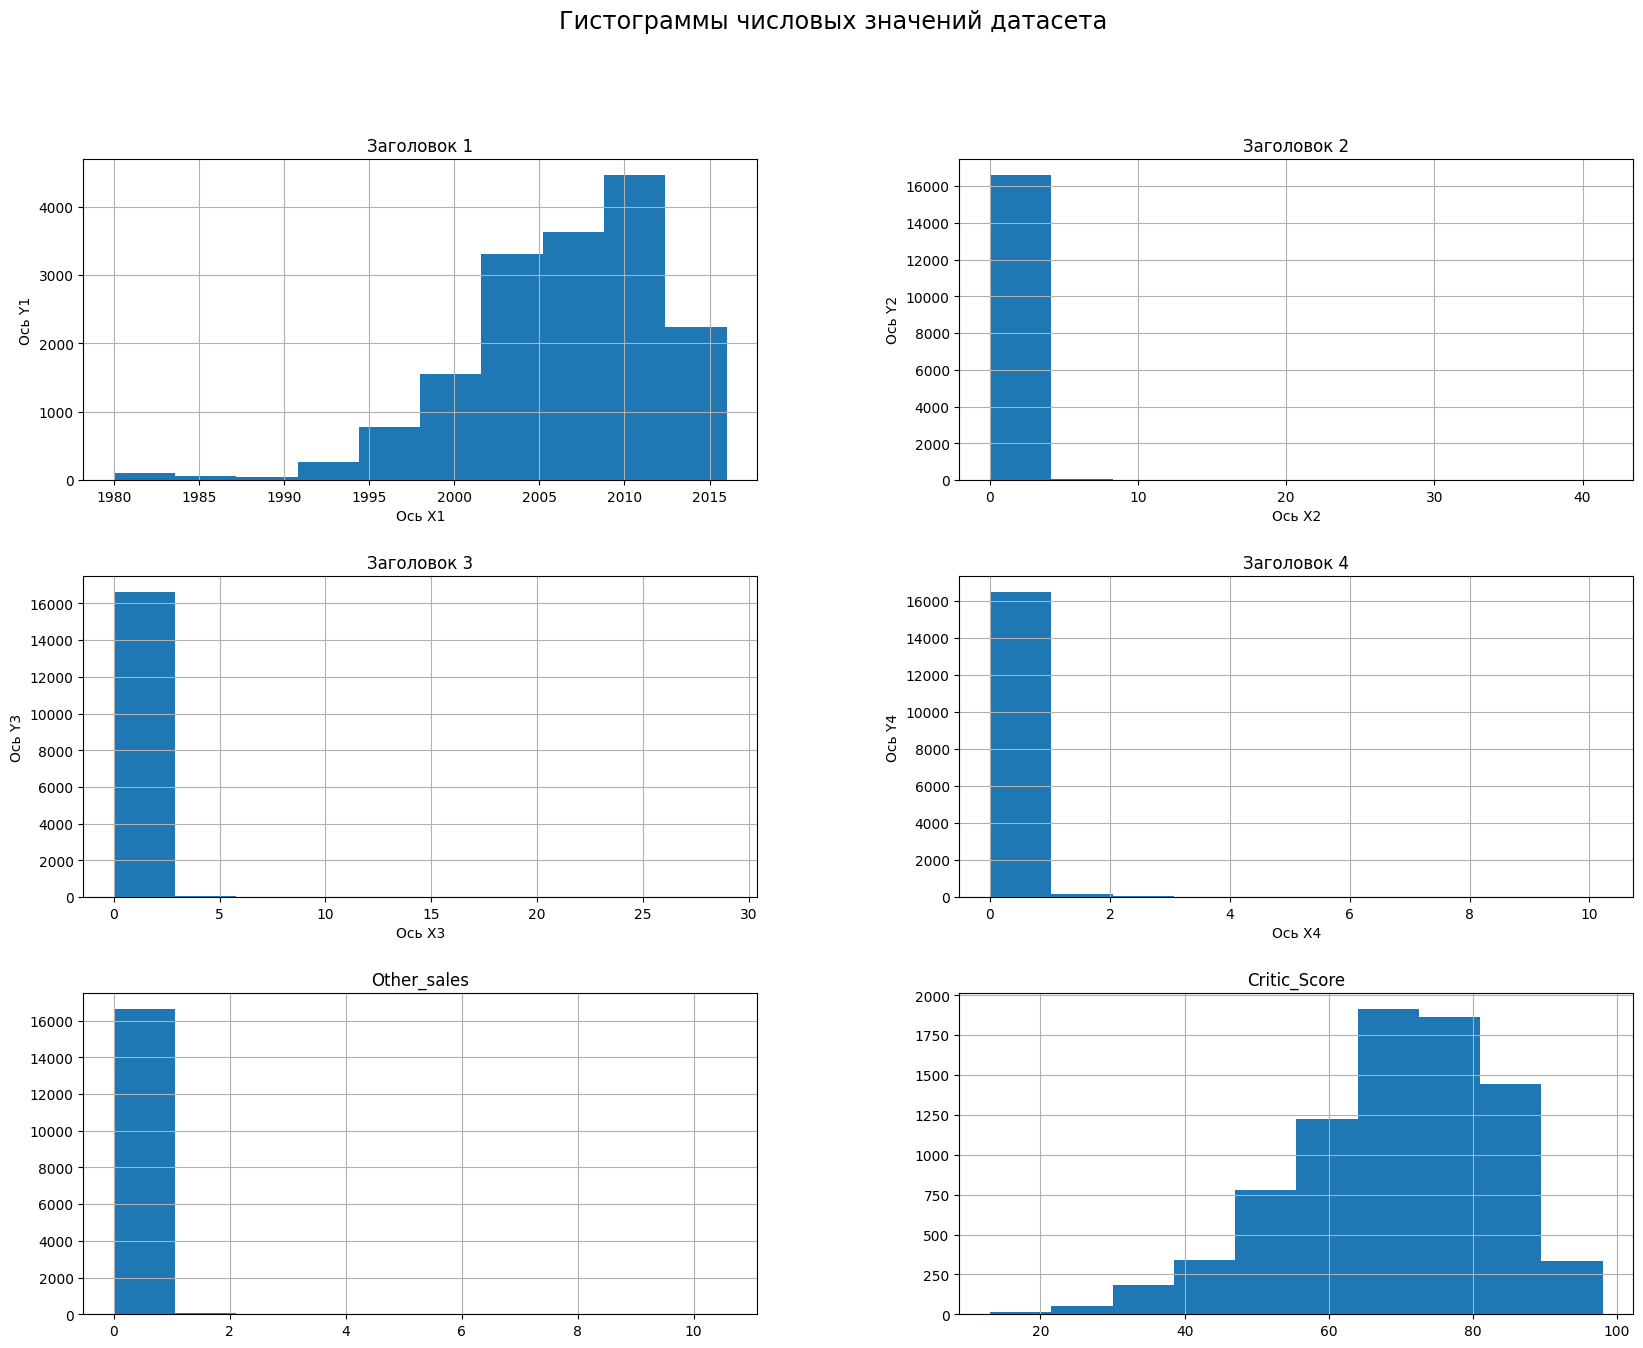

In [6]:
axes = df.hist(grid=True, figsize=(20,15))
axes[0,0].set_title('Заголовок 1')
axes[0,0].set_xlabel('Ось Х1')
axes[0,0].set_ylabel('Ось Y1')

axes[0,1].set_title('Заголовок 2')
axes[0,1].set_xlabel('Ось Х2')
axes[0,1].set_ylabel('Ось Y2')

axes[1,0].set_title('Заголовок 3')
axes[1,0].set_xlabel('Ось Х3')
axes[1,0].set_ylabel('Ось Y3')

axes[1,1].set_title('Заголовок 4')
axes[1,1].set_xlabel('Ось Х4')
axes[1,1].set_ylabel('Ось Y4')
# И так далее по всем гистограммам

plt.suptitle('Гистограммы числовых значений датасета', ha='center', fontsize='xx-large')
plt.show()

## Вывод по шагу 1:
На первый взгляд в данных присутствует только одна аномалия - **нулевые** продажи игр во всех регионах, необходимо обработать эти значения в шаге **Предобработка данных**; <br>
Судя по гистограммам `year_of_release` и `critic_score`, числовые значения в этих столбцах подчиняются **нормальному распределению**; <br>
Не все столбцы данных имеют корректный тип данных (`year_of_release`, `user_score`), требуется изменить их тип в шаге **Предобработка данных**; <br>
Наблюдаются пропуски в значениях некоторых столбцов (`name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`, требуется их обработка в шаге **Предобработка данных**; <br>
Названия столбцов необходимо привести к **snake_case**.

# Шаг 2. Предобработка данных

## Приведение названий столбцов датафрейма к регистру snake_case

In [7]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Обработка пропущенных значений

### Название игры - df['name']

In [8]:
df['name'].isna().sum()

2

In [9]:
df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные строки ***не несут ценности для исследования*** (1993 год, большинство параметров пропущено), следовательно их можно `удалить`.

In [10]:
df = df.dropna(subset=['name'])

### Год выхода игры - df['year_of_release']

In [11]:
df['year_of_release'].isna().sum()

269

In [12]:
df.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Ранее в датафрейме были обнаружены игры, которые выпущены на разные платформы. Проверим, нет ли среди них строк с пропущенным значением в колонке `year_of_release`:

In [13]:
different_platforms = df.query('name.duplicated() and year_of_release.isna()')
display(different_platforms)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.0,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.0,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1131,Call of Duty: Black Ops,PC,NaN,Shooter,0.58,0.81,0.0,0.23,81.0,5.2,M
...,...,...,...,...,...,...,...,...,...,...,...
16329,Brothers in Arms: Furious 4,X360,NaN,Shooter,0.01,0.00,0.0,0.00,NaN,NaN,M
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.0,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.0,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.0,0.00,59.0,6.7,M


In [14]:
# Рассмотрим пример одной из игр:
df.query('name == "LEGO Batman: The Videogame"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


На данном примере видно, что пропущенное значение в колонке `year_of_release` вполне можно заменить медианным. Если даже год выпуска игры не будет полностью совпадать, сильных отклонений быть не должно, так как обычно игры портируют в срок 1-3 года после релиза, либо сразу на все платформы. Сделаем так для всех **105** найденных значений:

In [15]:
different_platforms_table = df.pivot_table(index='name', values='year_of_release', aggfunc='median').sort_values(by='year_of_release', ascending=False)
display(different_platforms_table)

,year_of_release
name,
Beyblade Burst,2016.0
River City Ransom SP,2016.0
Battlefield 1,2016.0
Battleborn,2016.0
Project Setsuna,2016.0
...,...
Front Line,1981.0
Checkers,1980.0
Kaboom!,1980.0


In [16]:
df['year_of_release'] = df['year_of_release'].fillna(0).astype('int64')

# создадим функцию, которая будет заменять в нужных строках ноль в столбце 'year_of_release' на медианное значение или на максимальное, если медиана окажется равной нулю:
def year_median(i):
    mid_year = i['year_of_release']
    if mid_year == 0:
        mid_year = max_year_table.loc[i['name'], 'year_of_release']
        return mid_year
    else:
        return i.year_of_release

max_year_table = df.pivot_table(index='name', values='year_of_release', aggfunc='max') # сводная таблица с максимальными значениями лет на случай, если медиана = 0    
    
df['year_of_release'] = df.apply(year_median, axis=1)

In [17]:
# проверка, как изменился срез с нулевыми значениями лет:
different_platforms = df.query('name.duplicated() and year_of_release.isna()')
display(different_platforms)
df.query('name == "LEGO Batman: The Videogame"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,2008,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,2008,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


Удалось устранить нули в некоторых значениях датафрейма. Так как больше гипотез по тому, как заполнить индикаторные значения, нет, избавимся от всех остальных строк с нулями, так как они будут не нужны для последующего анализа:

In [18]:
df = df.query('year_of_release != 0')

Среди строк с пропущенным значением года выхода **нет явных аномалий и закономерностей**, соответственно причина, по которой пропуски были допущены, **не ясна**, следовательно, придется `удалить пропуски`, так как единственное, что можно сделать с этими значениями - полностью удалить строки. Замечено также, что в названии некоторых игр содержится год, но заполнять столбец `year_of_release` на основе этих данных нецелесообразно, так как цифра в названии не всегда совпадает с реальным годом релиза (например, релиз `Ima manager 2007` состоялся в **2006** году).

### Жанр игры - df['genre']

In [19]:
df['genre'].isna().sum()

0

Так как строки, где **отсутствовали названия игр** совпадают со строками, где **отсутствовали названия жанров**, и они были удалены в **п. 4.1** последующая обработка пропущенных значений в данном столбце `не требуется`.

### Оценки критиков - df['critic_score']

In [20]:
df['critic_score'].isna().sum()

8492

Проверяем гипотезу о том, что большинство игр с отсутствующими значениями **оценок критиков и игроков** попросту не оценивались обоими категориями пользователей:

In [21]:
df.query('critic_score.isna() and user_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Совпадение достаточно велико - **6661** пропусков из **8576** присутствуют в обоих столбцах, соответственно, данные игры не оценивались вообще. Скорее всего это связано с тем, что игры вышли слишком давно и система оценок была совсем другой, поэтому они не учитывались, либо имели слишком мало продаж и распространялись на тех площадках, на которых оценки пользователей не предусмотрены или же просто не были занесены в верифицированные источники. Проверим данную гипотезу:

In [22]:
df.query('critic_score.isna() and user_score.isna() and (year_of_release < 2006 or (na_sales < 0.1 and eu_sales < 0.1 and jp_sales < 0.1 and other_sales < 0.1))')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Совпадение достаточно велико (**5329** значений из **6661**), соответственно, это может быть вполне вероятной причиной наличия пропусков. <br>
Эти пропуски необходимо `оставить` или для удобства обработки данных **заменить их на индикаторное значение (-1)**, так как они вряд ли по причинам, указанным выше, помогут в прогнозе продаж игр на **2017 год**. Проверим оставшиеся пропуски в обоих датафреймах:

In [23]:
df.query('critic_score.isna() and ~user_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M
263,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E
291,World Soccer Winning Eleven 9,PS2,2005,Sports,0.12,2.26,0.90,0.77,NaN,8.2,E
...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,tbd,M
16681,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,NaN,tbd,T
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E


Данные пропуски также необходимо `оставить` или для удобства обработки данных **заменить их на индикаторное значение - 0**, так как нет явных закономерностей, по которым оценки могут отсутствовать - либо издатель скрыл оценки, либо данные игры не рассматривались критиками, либо оценки были не из верифицированных источников.

### Оценки игроков - df['user_score']

Для начала посмотрим, сколько оценок игроков содержат `tbd` - ***to be determined***:

In [24]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Значительное количество, удалить строки с данными значениями не получится. Обычно tbd означает, что оценка еще формируется и не набралось еще достаточное количество оценок, но в данном случае это не так - строки с `tbd` содержат игры за разные годы. Так как источник данных - открытый, может быть много причин, почему в данный столбец записано `tbd` - издатель решил не опубликовывать оценки, оценок было слишком мало или их источник не ясен. Ввиду того, что единой объяснимой причины для этих значений нет, для удобства обработки данных **заменим их на индикаторное значение (-1)**.

Рассмотрим остальные пропуски, которые не совпадают с **нулями** в значениях столбца `critic_score`:

In [25]:
df.query('user_score.isna() and ~critic_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
182,Tomb Raider II,PS,1997,Action,2.30,2.46,0.20,0.28,85.0,NaN,T
440,Need for Speed III: Hot Pursuit,PS,1998,Racing,2.14,0.86,0.00,0.13,88.0,NaN,E
637,Riven: The Sequel to Myst,PC,1997,Adventure,1.52,0.82,0.00,0.10,83.0,NaN,E
1981,Monster Rancher 2,PS,1998,Simulation,0.19,0.13,0.66,0.07,83.0,NaN,E
2195,MVP Baseball 2005,XB,2005,Sports,0.70,0.20,0.00,0.03,86.0,NaN,NaN
3816,The Grinch,PS,1999,Adventure,0.29,0.20,0.00,0.03,55.0,NaN,E
4029,Power Rangers: Dino Thunder,GBA,2003,Action,0.35,0.13,0.00,0.01,49.0,NaN,E
6636,Jonah Lomu Rugby Challenge,PS3,2011,Sports,0.00,0.19,0.00,0.06,64.0,NaN,E
6641,Bomberman Tournament,GBA,2001,Puzzle,0.10,0.04,0.10,0.01,88.0,NaN,E
7322,WCW Backstage Assault,PS,1999,Action,0.12,0.08,0.00,0.01,40.0,NaN,T


Пропусков не так много, и они также могут быть объяснены причинами, указанными в разделе к поиску пропусков в df['critic_score']. Заменим пропуски на `индикаторное значение - 0`

### Возрастной рейтинг игры - df['rating']

In [26]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [27]:
df['rating'].isna().sum()

6699

Пропуски в возрастном рейтинге игры означают, что либо он еще не установлен на момент опубликования данных, либо он не установлен на территории страны, в которой издаются игры (например, в Японии работает система **CERO**, в Европе - **PEGI**), либо игры были изданы до **1994** года, когда была создана организация ESRB. Проверим эти гипотезы:

In [28]:
# проверка того, что рейтинг не присвоен, потому что организация еще не существовала:
df.query('rating.isna() and year_of_release < 1995')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15551,Mortal Kombat,PC,1994,Fighting,0.02,0.00,0.00,0.00,NaN,NaN,NaN
15692,Empire Deluxe,PC,1992,Strategy,0.02,0.00,0.00,0.00,NaN,NaN,NaN
15788,World Class Rugby 2: Kokunai Gekitou Hen '93,SNES,1994,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN


In [29]:
# проверка того, что рейтинг еще не установлен для самых новых игр:
df.query('rating.isna() and year_of_release == 2016')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN
1216,Ratchet & Clank (2016),PS4,2016,Platform,0.50,0.76,0.04,0.24,NaN,NaN,NaN
1275,Doom (2016),PS4,2016,Shooter,0.54,0.69,0.02,0.24,NaN,NaN,NaN
1466,Yokai Watch 3,3DS,2016,Action,0.00,0.00,1.33,0.00,NaN,NaN,NaN
1475,The Elder Scrolls V: Skyrim,PS4,2016,Role-Playing,0.48,0.59,0.04,0.21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Таким образом, **703** пропуска из **6764** вполне закономерны, тогда как на оставшиеся **6000** могли повлиять самые разные причины, включая несогласованность рейтингов **CERO**, **PEGI** и **ESRB**. Все пропущенные значения также необходимо заменить на единый индикатор. Так как в столбце содержатся объекты типа `object`, необходимо заполнить его не численным значением для удобства обработки данных. Заполним пропуски значением `Unknown`.

## Итог обработки пропущенных значений

In [30]:
df['critic_score'] = df['critic_score'].fillna(-1) # заменяем на индикатор -1
df['user_score'] = df['user_score'].fillna(-1) # заменяем на индикатор -1
df['user_score'] = df['user_score'].replace(['tbd'], -1, regex=True)
df['rating'] = df['rating'].fillna('Unknown') # заменяем на индикатор 'Unknown'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  object 
 10  rating           16567 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


## Преобразование типов данных

Необходимо изменить типы данных у следующих столбцов датафрейма: <br>
1. `year_of_release`: **float -> int** (так как год выхода игры - всегда целое число, и в данном случае не имеет смысл приводить к **datetime**, так как в рамках кейса нет данных о конкретной дате релиза, только год); <br>
2. `user_score`: **object -> float** (так как пользовательская оценка - число с десятичной дробью, все значения типа **str** необходимо обработать).

In [31]:
df['year_of_release'] = df['year_of_release'].astype('int64')
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## Обработка дубликатов

In [32]:
# Проверка на наличие явных дубликатов:
df.duplicated().sum()

0

In [33]:
# Проверка на наличие неявных дубликатов в столбце "name":
df['name'].value_counts().sort_values(ascending=False)
df.query('name == "need for speed: most wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Дубликаты в столбце `name` связаны с тем, что это одна и та же игра, выпущенная под разные игровые платформы и консоли. Следовательно, дальнейшая обработка дубликатов **не требуется**.

In [34]:
# создадим копию оригинального датафрейма с тремя интересующими нас колонками и приведем колонки с названиями к нижнему регистру:
dupes_check = df[['name', 'platform', 'year_of_release']].copy()

dupes_check['name'] = dupes_check['name'].str.lower()
dupes_check['platform'] = dupes_check['platform'].str.lower()

dupes_check.duplicated().sum()
display(dupes_check[dupes_check.duplicated(keep=False)])

display(df.query('index == 604 or index == 16230'))
display(df.query('index == 1745 or index == 4127'))

# так как все значения кроме продаж полностью совпадают, то необходимо занести суммарные продажи по регионам в одну из строк и удалить другую:
df['eu_sales'][604] = 0.23
df['eu_sales'][1745] = 0.54

df = df.query('index != 4127 and index != 16230')

,name,platform,year_of_release
604,madden nfl 13,ps3,2012
1745,sonic the hedgehog,ps3,2006
4127,sonic the hedgehog,ps3,2006
16230,madden nfl 13,ps3,2012


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,2006,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


C:\Users\igorg\AppData\Local\Temp\ipykernel_21168\1892780184.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['eu_sales'][604] = 0.23
C:\Users\igorg\AppData\Local\Temp\ipykernel_21168\1892780184.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['eu_sales'][1745] = 0.54


In [35]:
display(df.query('index == 604 or index == 16230'))
display(df.query('index == 1745 or index == 4127'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.54,0.04,0.66,43.0,4.1,E10+


## Добавление столбца с суммарными продажами

In [36]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16565 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16565 non-null  object 
 1   platform         16565 non-null  object 
 2   year_of_release  16565 non-null  int64  
 3   genre            16565 non-null  object 
 4   na_sales         16565 non-null  float64
 5   eu_sales         16565 non-null  float64
 6   jp_sales         16565 non-null  float64
 7   other_sales      16565 non-null  float64
 8   critic_score     16565 non-null  float64
 9   user_score       16565 non-null  float64
 10  rating           16565 non-null  object 
 11  total_sales      16565 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [37]:
display(df.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,Unknown,28.31


## Вывод по шагу 2:

Анализ данных датафрейма привел к следующим результатам: <br>
1. Обнаружены пропущенные значения в столбцах `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`. В результате обработки пропущенных значений были удалены **2 строки**, которые избавили датафрейм от пропусков в столбцах `name` и `genre`. Пропуски в остальных столбцах были заменены на индикаторные значения (**-1**, **Unknown**), так как нет возможности избавиться от пропусков другими методами, не исказив средние и медианные значения, которые понадобятся в исследовании. При расчете соответсвующих параметров можно будет не учитывать эти значения, отфильтровав выборку по индикаторам, приведенным выше; <br>
2. Типы данных в столбцах `year_of_release` и `user_score` были приобразованы из **float** в **int64** и из **object** во **float** соответственно;
3. Явных дубликатов **обнаружено не было**, неявные дубликаты в количестве **2 ед.** были **обработаны**;
4. Были рассчитаны суммарные продажи по всем регионам и добавлен соответствующий столбец `total_sales`.

In [38]:
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16565 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16565 non-null  object 
 1   platform         16565 non-null  object 
 2   year_of_release  16565 non-null  int64  
 3   genre            16565 non-null  object 
 4   na_sales         16565 non-null  float64
 5   eu_sales         16565 non-null  float64
 6   jp_sales         16565 non-null  float64
 7   other_sales      16565 non-null  float64
 8   critic_score     16565 non-null  float64
 9   user_score       16565 non-null  float64
 10  rating           16565 non-null  object 
 11  total_sales      16565 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

# Шаг 3. Исследовательский анализ данных

## Исследование выпущенных игр по годам

Избавившись от всех ненужных значений по индикатору, начинаем исследовать столбец с переменными:

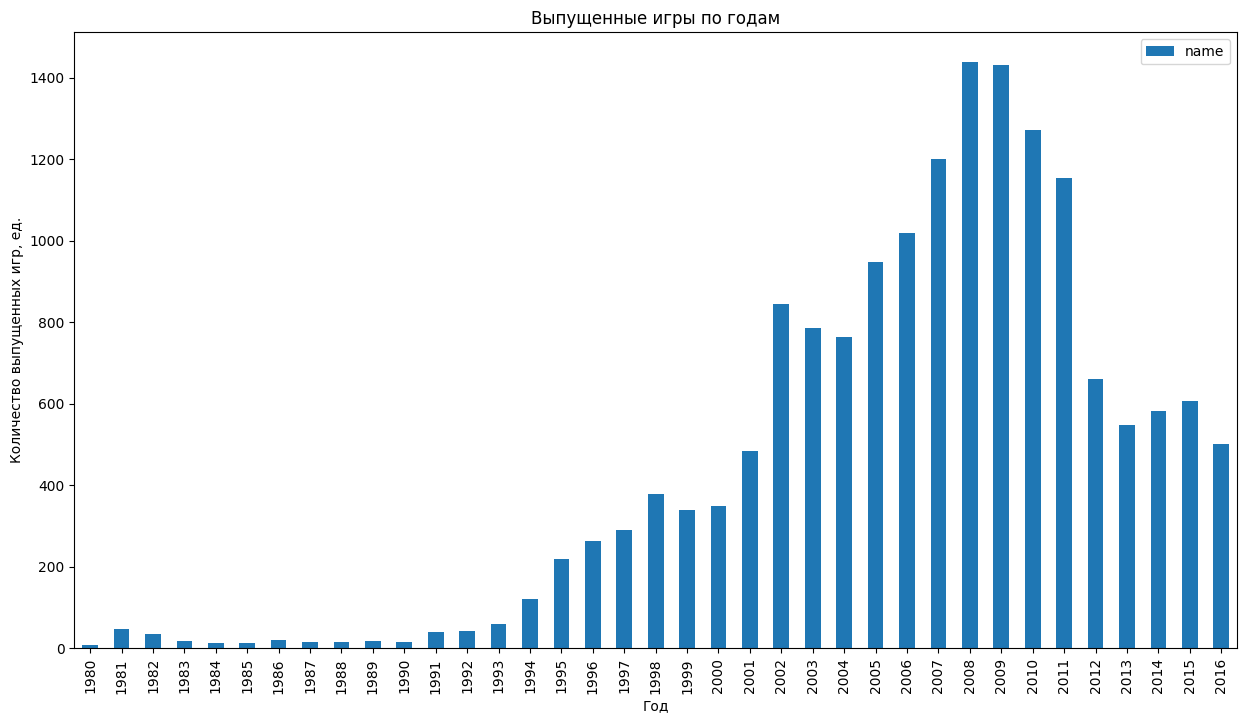

In [39]:
games_by_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count')

games_by_year.plot(kind='bar', figsize=(15,8))
plt.ylabel('Количество выпущенных игр, ед.')
plt.xlabel('Год')
plt.title('Выпущенные игры по годам')
plt.show()

На данном этапе исследования видно, что значения столбца подчиняются нормальному распределению с совсем небольшими значениями "левого" хвоста. Эти данные пока что могут быть полезны для исследования платформ, после этого левый "хвост" можно будет удалить, так как он составляет слишком малую часть данных.

## Исследование игровых платформ

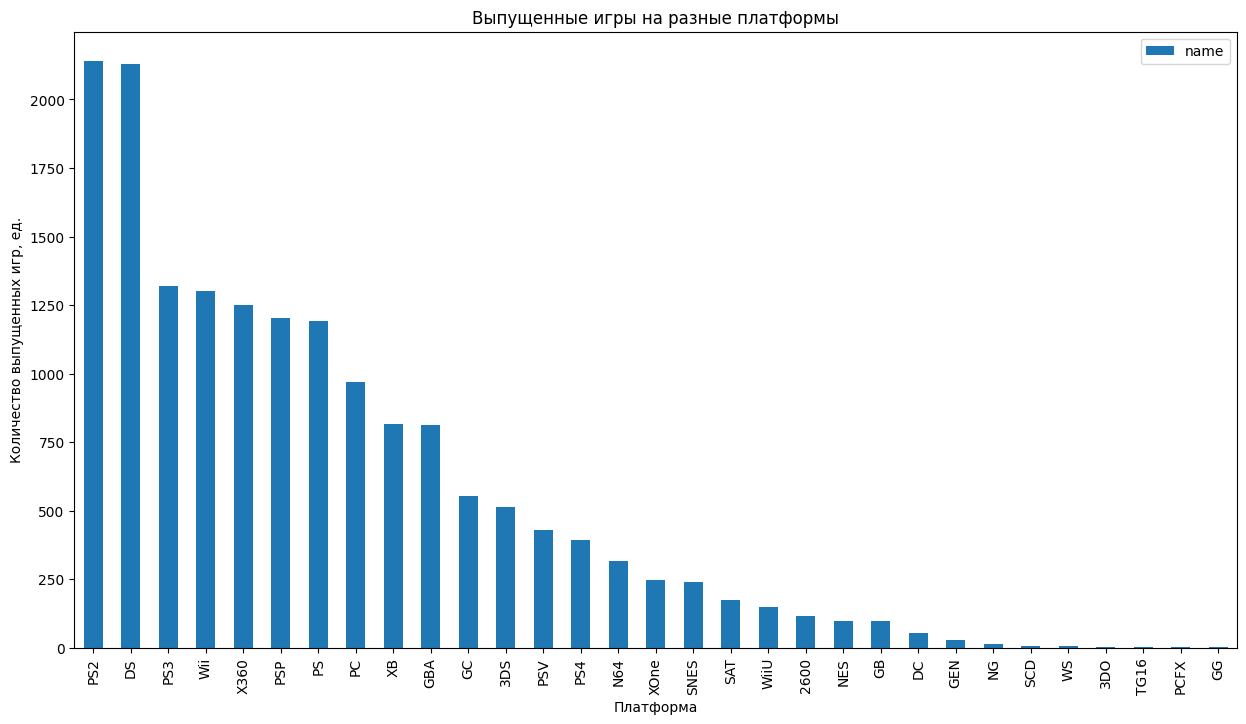

In [40]:
# Определим платформы с самым большим количеством выпущенных игр:
games_by_platform = df.pivot_table(index='platform', values='name', aggfunc='count').sort_values(by='name', ascending=False)
#display(games_by_platform)
games_by_platform.plot(kind='bar', figsize=(15,8))
plt.ylabel('Количество выпущенных игр, ед.')
plt.xlabel('Платформа')
plt.title('Выпущенные игры на разные платформы')
plt.show()

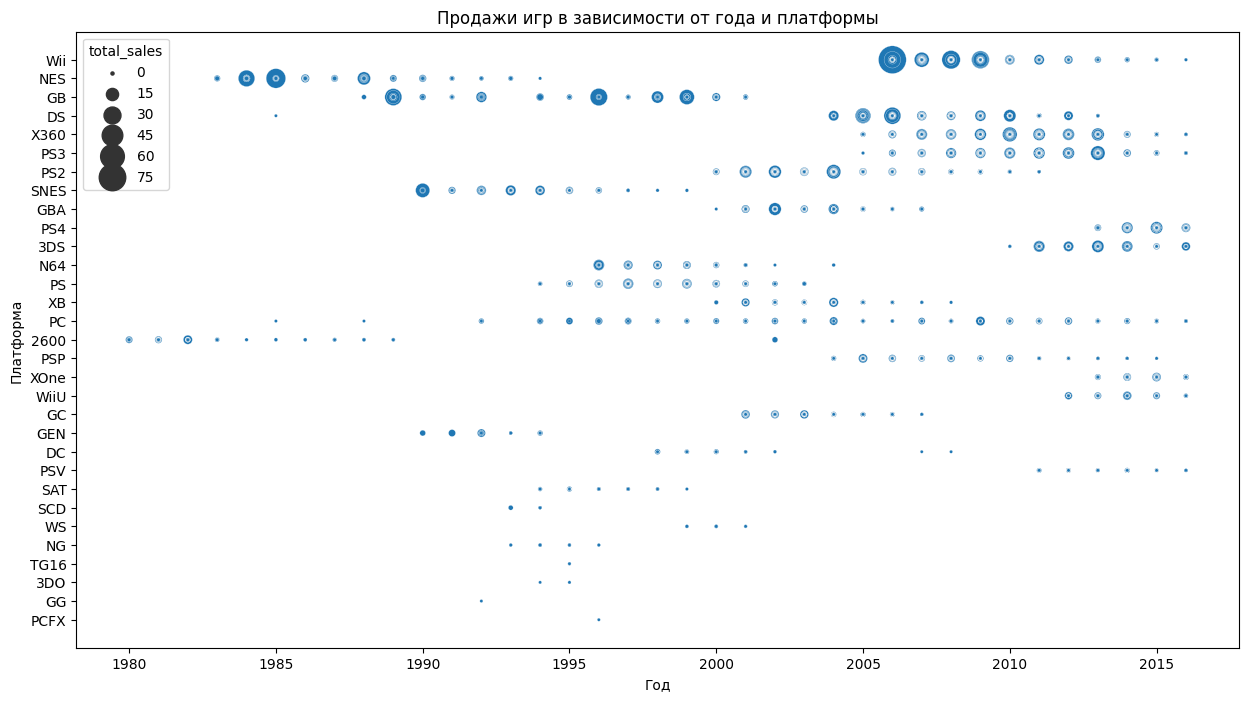

In [41]:
# построим распределение по количеству продаж в зависимости от платформы и года:
fig = plt.gcf()
fig.set_size_inches(15,8)
sb.scatterplot(data=df, x='year_of_release', y='platform', size='total_sales', sizes=(5, 400))
plt.title('Продажи игр в зависимости от года и платформы')
plt.ylabel('Платформа')
plt.xlabel('Год')
plt.show()

Как видно из диаграммы рассеивания по всем платформам, **средний срок их жизни** примерно равен **7-8** годам, до **2002** года большинство старых платформ уже "умерло", а самыми **крупными по продажам за один год** являются на момент опубликования данных платформы `NES`, `GB`, `Wii`, `DS`, `X360`, `PS3`, `PS2`. Самой **стабильной** платформой является `PC`. <br>
Подтвердим данные утверждения более точными результатами вычислений:

In [42]:
# проверяем медианный срок жизни платформы
temp = df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

8.0

Действительно, среднее время жизни платформы - **7.8** года. Теперь не основе полученных данных определим, насколько часто появляются новые платформы:

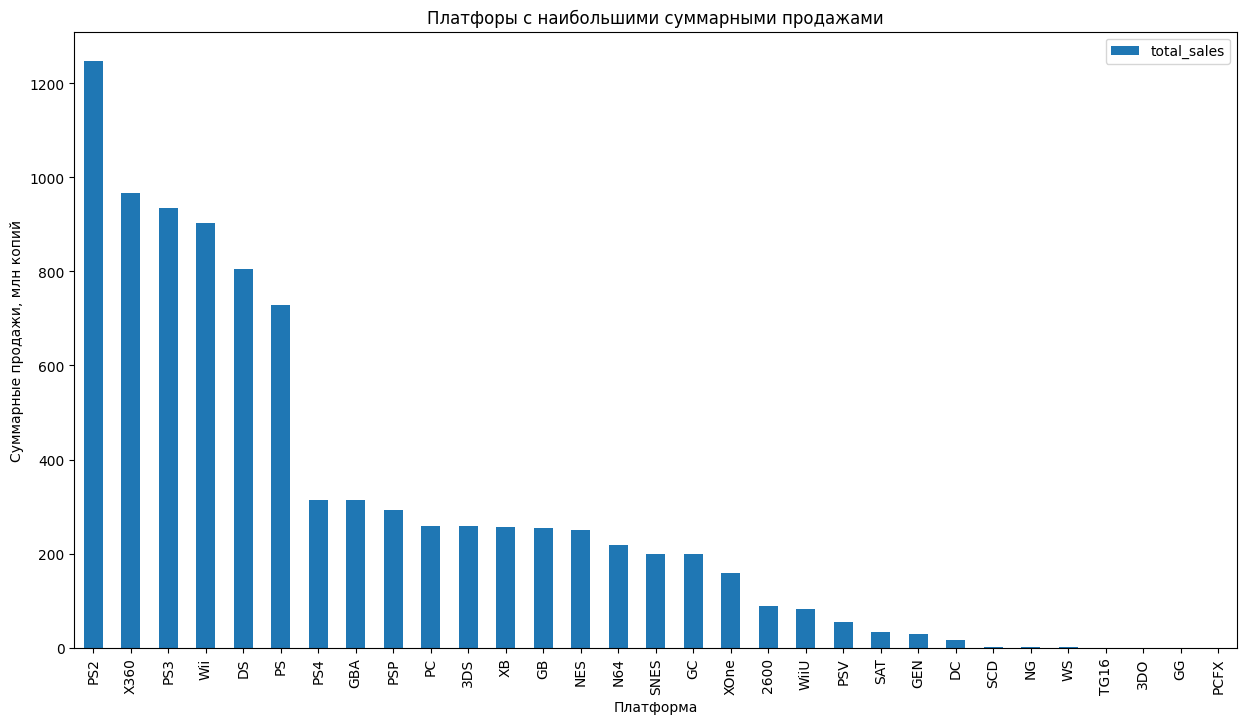

In [43]:
# проверка самых крупных платформ по продажам:
platform_revenue = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
#display(platform_revenue)

#fig = plt.gcf()
#fig.set_size_inches(15,8)
#sb.barplot(data=platform_revenue, x='platform', y='total_sales')
platform_revenue.plot(kind='bar', figsize=(15,8))
plt.title('Платфоры с наибольшими суммарными продажами')
plt.ylabel('Суммарные продажи, млн копий')
plt.xlabel('Платформа')
plt.show()

In [44]:
# modern_platforms = ["PS2", "X360", "PS3", "Wii", "DS", "PS", "PS4", "GBA", "PSP", "PC", "3DS", "XB", "GB", "NES", "N64", "SNES", "GC", "XOne"]
df = df.query('year_of_release >= 2014') # and platform.isin(@modern_platforms)')
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,Unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,Unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01


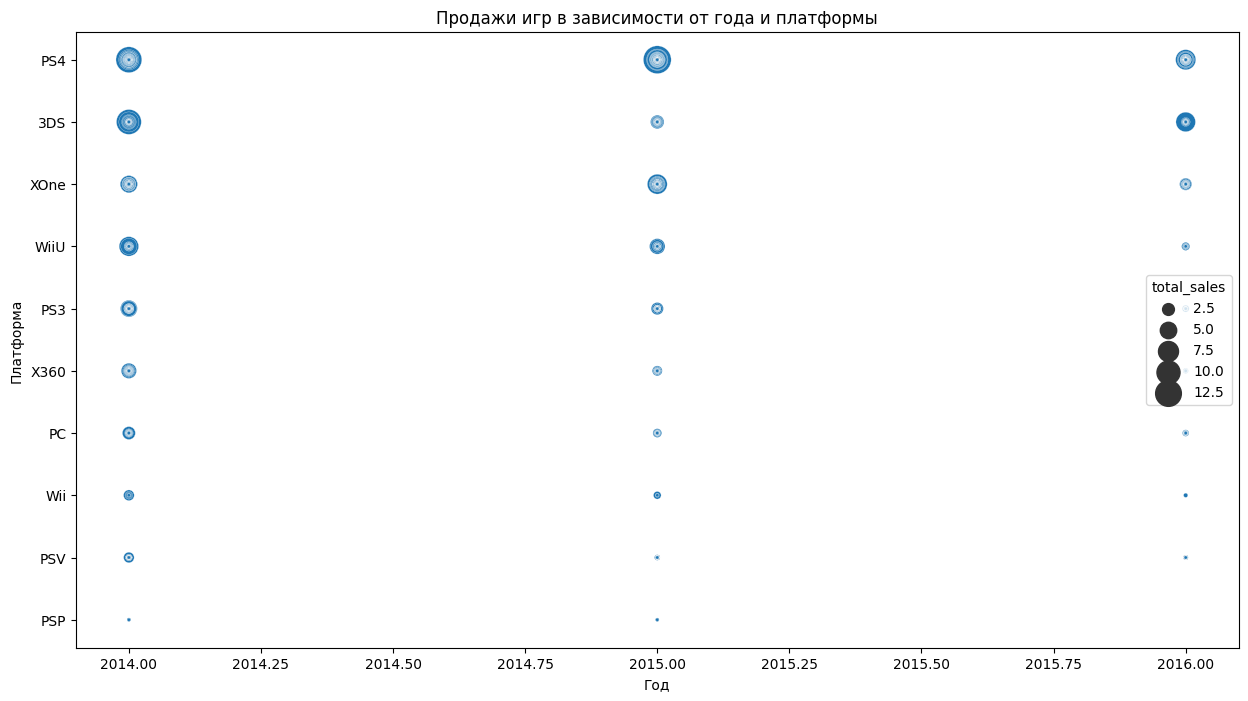

In [45]:
fig = plt.gcf()
fig.set_size_inches(15,8)
sb.scatterplot(data=df, x='year_of_release', y='platform', size='total_sales', sizes=(5, 400))
plt.title('Продажи игр в зависимости от года и платформы')
plt.ylabel('Платформа')
plt.xlabel('Год')
plt.show()

Большинство платформ, которые лидировали по продажам в разные годы, в интересующий период времени ***подошли к концу своего жизненного цикла***. Из платформ, жизненный цикл которых еще не подходит к окончанию, и при этом на момент **2014-2016** года у них неплохие продажи, выделяются только две - **PS4** и **XOne** (*X-box One*). Также стоит включить в эту категорию приставку **3DS**, так как прогноз необходимо выполнить на **2017** год, у данной приставки хорошие подажи в **2016** году, и ее приблизительный жизненный цикл продлится минимум до конца **2017** года. <br>
По совокупности факторов, лидирующей приставкой является **PS4**. <br>

## Исследование распределения продаж игр по платформам за актуальный период

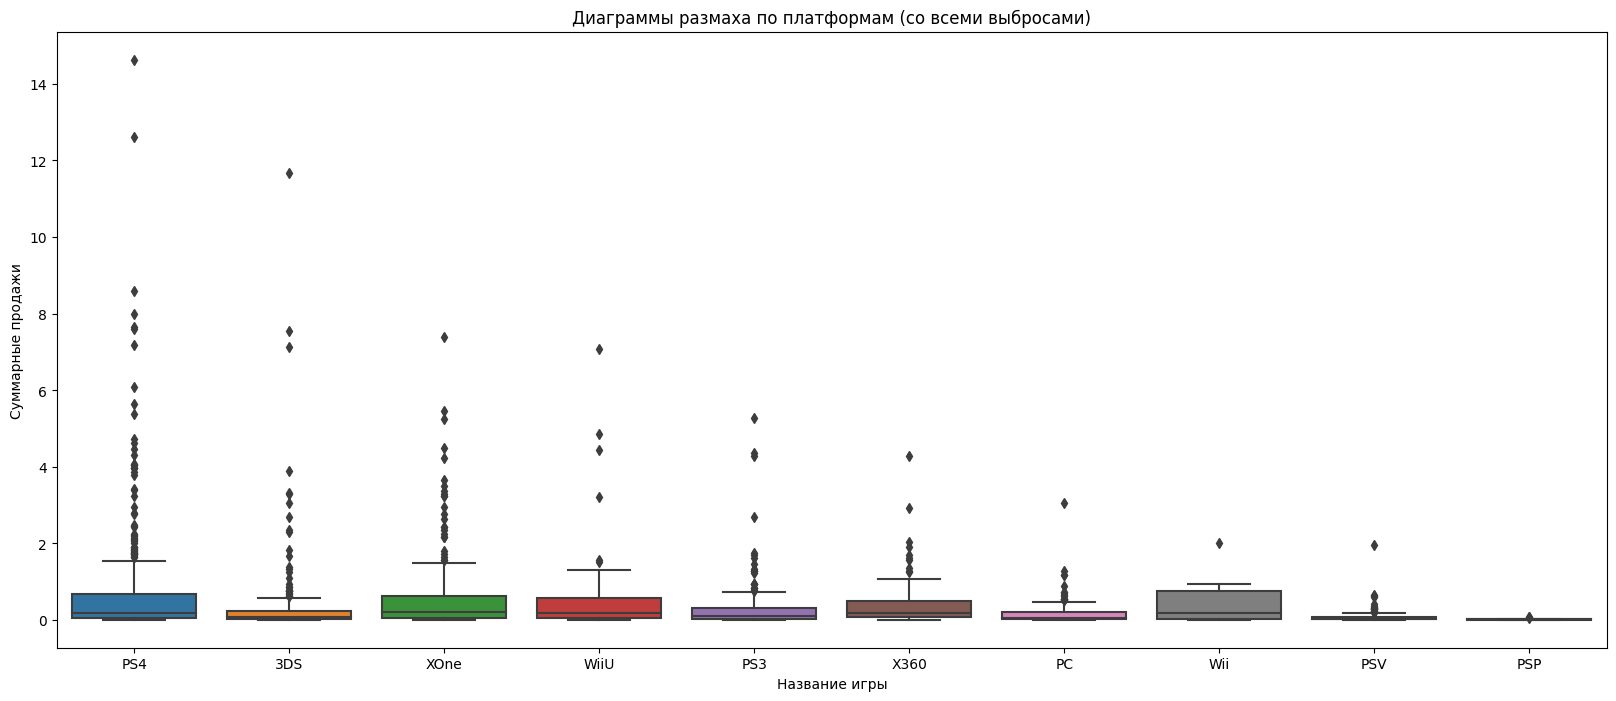

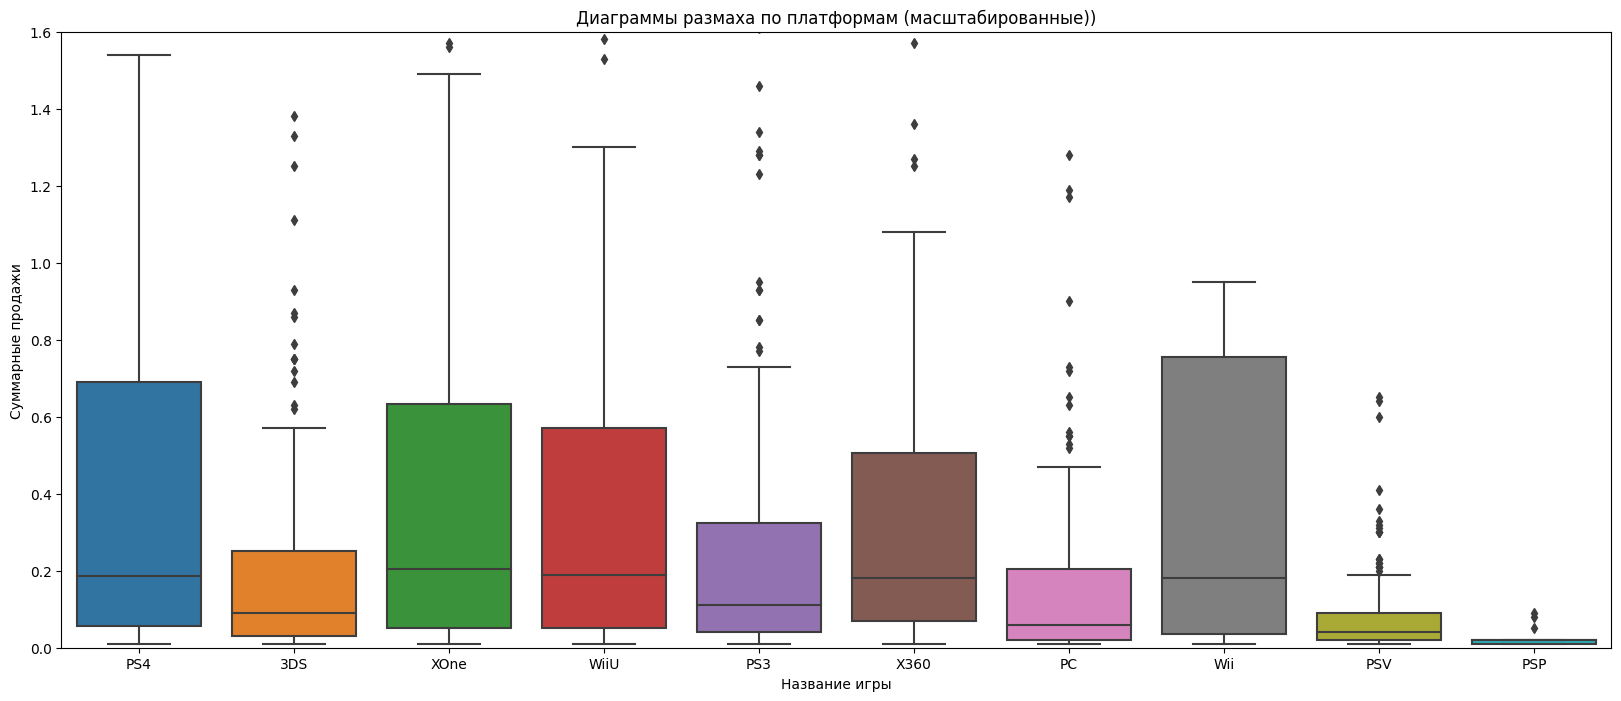

In [46]:
# составим список игр за актуальный период и построим по нему диаграмму размаха, а также наложим гистограммы с распределением суммарных продаж игр по платформам:
game_table = df.sort_values(by='total_sales', ascending=False).reset_index(drop=True)
#display(df_top10)


# полные диаграммы размаха со всеми выбросами:
fig = plt.gcf()
fig.set_size_inches(20,8)
ax = sb.boxplot(x='platform', y='total_sales', data=game_table)
#sb.barplot(x='name', y='total_sales', hue='platform', data=game_table, linewidth=0.5, alpha=0.4, ax=ax)
plt.title('Диаграммы размаха по платформам (со всеми выбросами)')
plt.ylabel('Суммарные продажи')
plt.xlabel('Название игры')
plt.show()

# масштабированные диаграммы размаха:
fig = plt.gcf()
fig.set_size_inches(20,8)
ax = sb.boxplot(x='platform', y='total_sales', data=game_table)
plt.ylim(0,1.6)
plt.title('Диаграммы размаха по платформам (масштабированные))')
plt.ylabel('Суммарные продажи')
plt.xlabel('Название игры')
plt.show()

In [47]:
game_table.query('total_sales == total_sales.max()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Unknown,14.63


In [48]:
game_table.query('name == "Call of Duty: Black Ops 3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Unknown,14.63
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-1.0,-1.0,Unknown,7.39
99,Call of Duty: Black Ops 3,X360,2015,Shooter,1.14,0.40,0.00,0.16,-1.0,-1.0,Unknown,1.70
101,Call of Duty: Black Ops 3,PS3,2015,Shooter,0.49,0.87,0.07,0.26,-1.0,-1.0,Unknown,1.69
506,Call of Duty: Black Ops 3,PC,2015,Shooter,0.00,0.25,0.00,0.01,-1.0,-1.0,Unknown,0.26


Из графика видно, что платформой с наибольшими продажами является `PS4`, что достигается в первую очередь засчет выбросов - продаж "хитов" и экслюзивных игр. Наиболее стабильной платформой, которая не сильно отстает от `PS4` по продажам, но при этом имеет более высокие медианные продажи, является `X-box One`. Близко к этим двум платформам находится `3DS`, которая все еще находится в топе из-за эксклюзивов и хитов, но медианные продажи у нее намного хуже, скорее всего из-за того, что ее жизненный цикл подходит к концу. У `WiiU`, напротив, достаточно высокие медианные продажи, но при этом почти нет эксклюзивов и хитов. <br>
Интересным фактом является то, что топ-1 игра по продажам - **Call of Duty: Black Ops 3** имеет продажи в два раза больше на платформе `PS4`. Возможно это связано с тем, что **Sony** выкупала временную эксклюзивность потенциально популярных игр, после чего только эти игры портировались на другие консоли, и засчет этого `PS4` обогнала `X-box One` по совокупным продажам. <br> 
Из данного исследования по-прежнему самыми перспективными платформами на **2017 год** являются `PS4` и `X-box One`.

## Исследование корреляции между отзывами и продажами

На примере самой популярной и перспективной консоли `PS4` рассмотрим корреляцию между отзывами игроков, критиков и продажами, построим диаграмму рассеяния. <br>
Помимо оценок игроков и критиков по отдельности можно посмотреть, как продажи зависят от средней оценки критиков и игроков, так как данный показатель охватывает все группы пользователей, которые пользуются продуктом. Также необходимо исключить нулевые оценки, и в случае, если ноль стоит только в пользовательских оценках, заменить среднюю оценку на оценку критиков, и наоборот. Оценки пользователей и критиков имеют разный порядок, поэтому предварительно оценки пользователей необходимо умножить на **10** (или разделить оценки критиков также на **10**, но остановимся на первом варианте).

In [49]:
# Все еще остались нулевые значения, поэтому для расчета корреляции сделаем два среза с оценками пользователей и критиков по датафрейму с даными за актуальный период:
df_corr_gamer = game_table.query('user_score > 0').reset_index(drop=True)
df_corr_critic = game_table.query('critic_score > 0').reset_index(drop=True)

In [50]:
print(len(df.query('critic_score > 0')))
print(len(df.query('user_score > 0')))
print(len(df.query('critic_score > 0 and user_score > 0')))

719
889
705


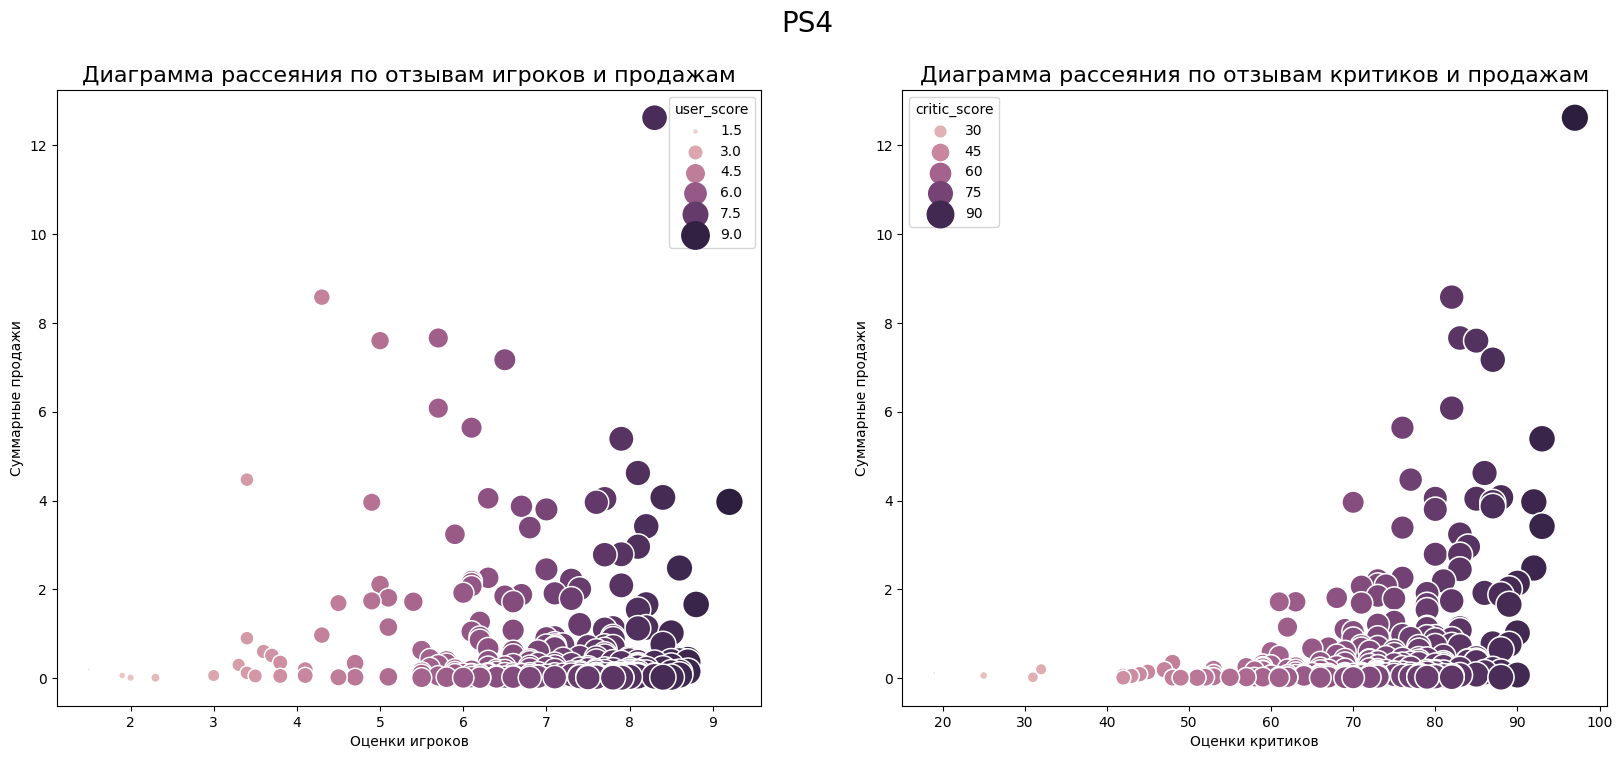

Корреляция между оценками игроков и продажами: -0.04013158947269733
Корреляция между оценками критиков и продажами: 0.4026614106810409


In [51]:
# Проведем корреляционный анализ и построим диаграммы рассеяния для платформы PS4:
corr_ps4_gamer = df_corr_gamer.query('platform == "PS4"')
corr_ps4_critic = df_corr_critic.query('platform == "PS4"')

fig, axis = plt.subplots(1,2, figsize=(20,8))
   
sb.scatterplot(x='user_score', y='total_sales', hue='user_score', size='user_score', sizes=(5,400), data=corr_ps4_gamer, ax=axis[0])     
sb.scatterplot(x='critic_score', y='total_sales', hue='critic_score', size='critic_score', sizes=(5,400), data=corr_ps4_critic, ax=axis[1])
plt.suptitle('PS4', fontsize=20)
axis[0].set_title('Диаграмма рассеяния по отзывам игроков и продажам', fontsize=16)
axis[0].set_xlabel('Оценки игроков')
axis[0].set_ylabel('Суммарные продажи')
axis[1].set_title('Диаграмма рассеяния по отзывам критиков и продажам', fontsize=16)
axis[1].set_xlabel('Оценки критиков')
axis[1].set_ylabel('Суммарные продажи')
plt.show()
print('Корреляция между оценками игроков и продажами:', corr_ps4_gamer['user_score'].corr(corr_ps4_gamer['total_sales']))
print('Корреляция между оценками критиков и продажами:', corr_ps4_critic['critic_score'].corr(corr_ps4_critic['total_sales']))

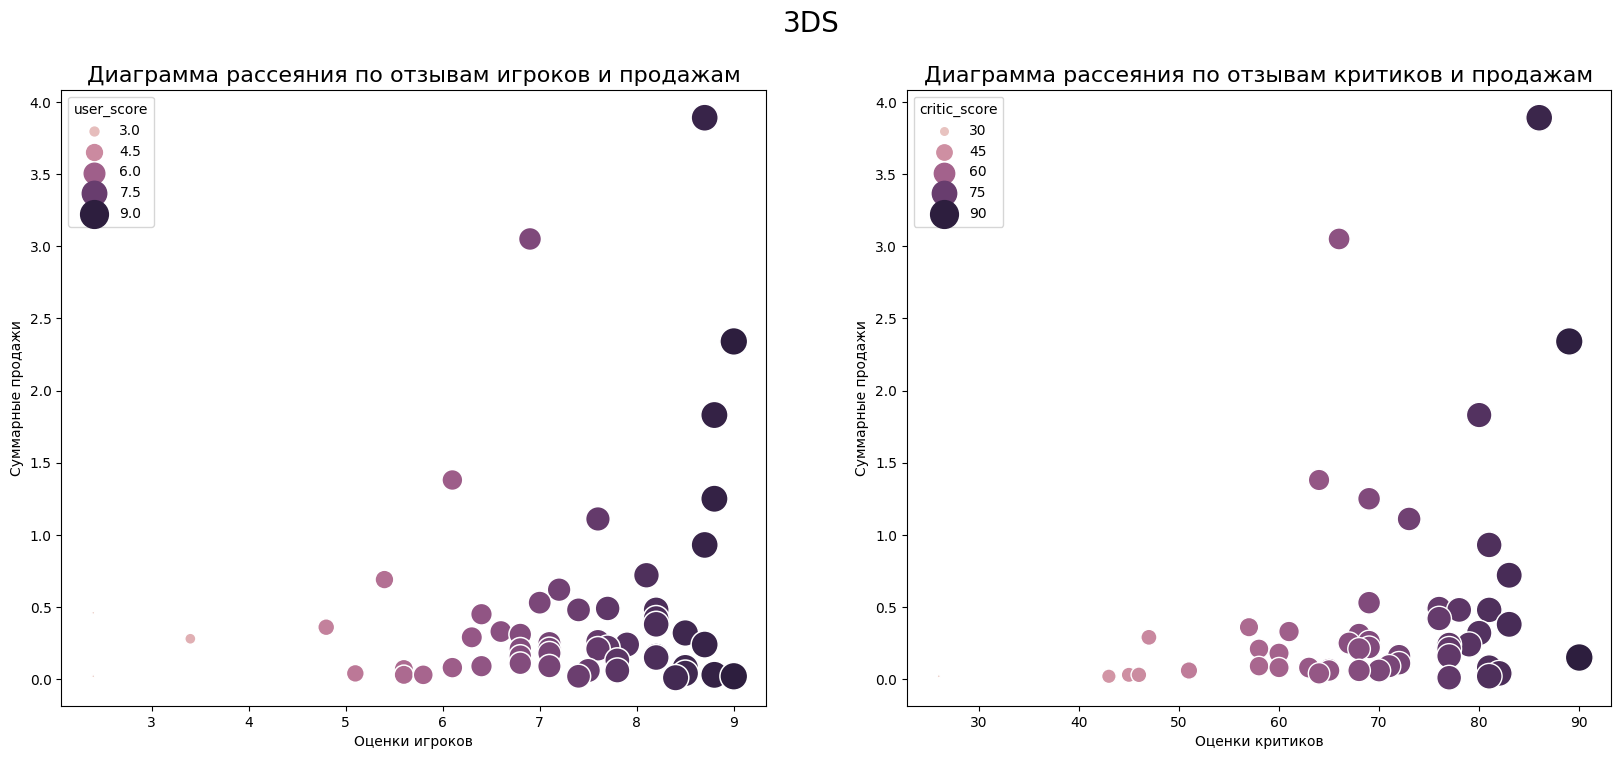

Корреляция между оценками игроков и продажами: 0.2151932718527027
Корреляция между оценками критиков и продажами: 0.314117492869051


In [52]:
# Проведем корреляционный анализ и построим диаграммы рассеяния для платформы 3DS:
corr_3ds_gamer = df_corr_gamer.query('platform == "3DS"')
corr_3ds_critic = df_corr_critic.query('platform == "3DS"')

fig, axis = plt.subplots(1,2, figsize=(20,8))
   
sb.scatterplot(x='user_score', y='total_sales', hue='user_score', size='user_score', sizes=(5,400), data=corr_3ds_gamer, ax=axis[0])     
sb.scatterplot(x='critic_score', y='total_sales', hue='critic_score', size='critic_score', sizes=(5,400), data=corr_3ds_critic, ax=axis[1])
plt.suptitle('3DS', fontsize=20)
axis[0].set_title('Диаграмма рассеяния по отзывам игроков и продажам', fontsize=16)
axis[0].set_xlabel('Оценки игроков')
axis[0].set_ylabel('Суммарные продажи')
axis[1].set_title('Диаграмма рассеяния по отзывам критиков и продажам', fontsize=16)
axis[1].set_xlabel('Оценки критиков')
axis[1].set_ylabel('Суммарные продажи')
plt.show()
print('Корреляция между оценками игроков и продажами:', corr_3ds_gamer['user_score'].corr(corr_3ds_gamer['total_sales']))
print('Корреляция между оценками критиков и продажами:', corr_3ds_critic['critic_score'].corr(corr_3ds_critic['total_sales']))

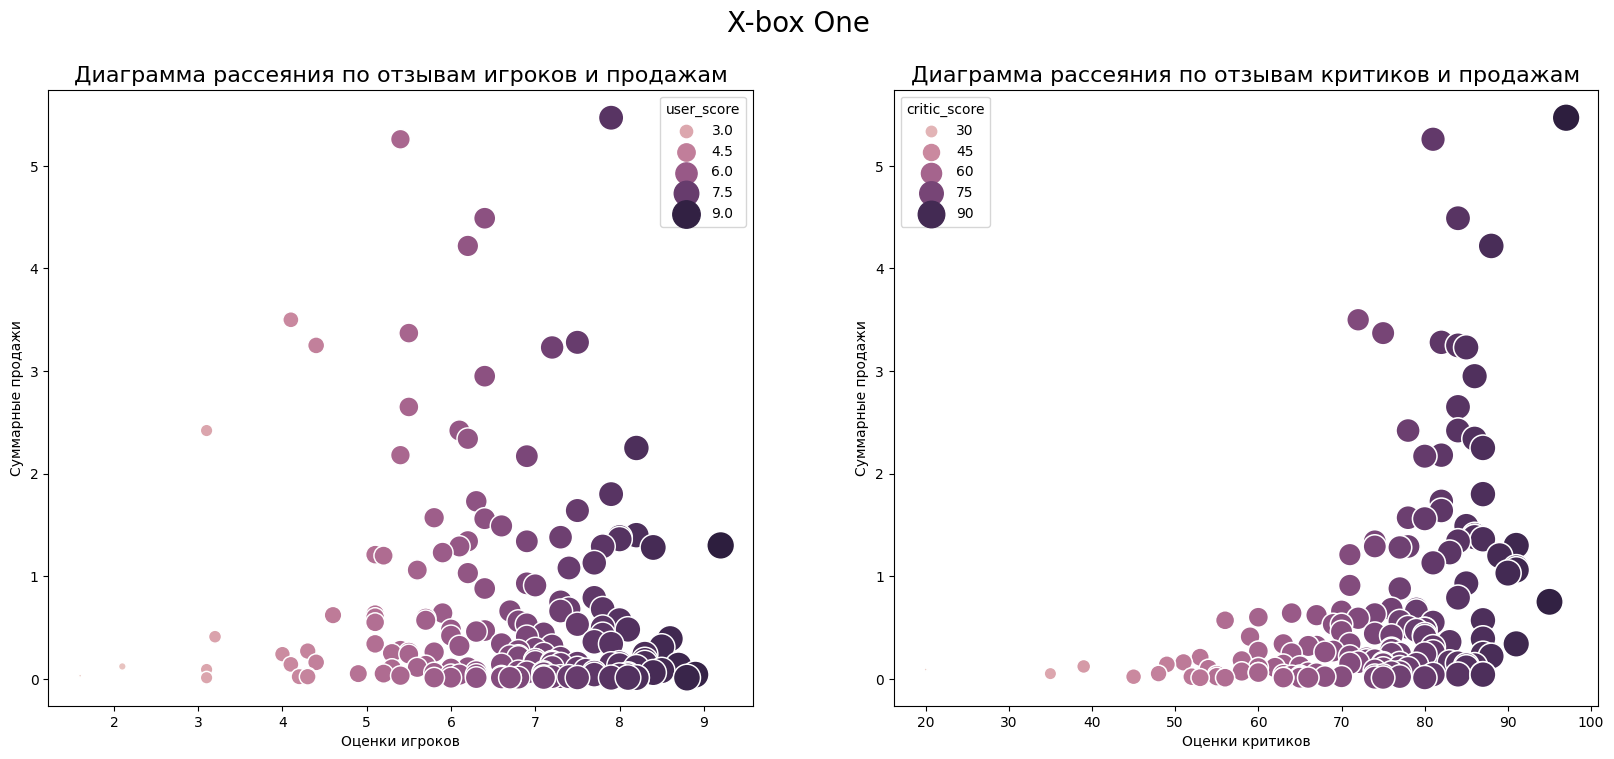

Корреляция между оценками игроков и продажами: -0.07038392806475818
Корреляция между оценками критиков и продажами: 0.42867694370333187


In [53]:
# Проведем корреляционный анализ и построим диаграммы рассеяния для платформы X-box One:
corr_xone_gamer = df_corr_gamer.query('platform == "XOne"')
corr_xone_critic = df_corr_critic.query('platform == "XOne"')

fig, axis = plt.subplots(1,2, figsize=(20,8))
   
sb.scatterplot(x='user_score', y='total_sales', hue='user_score', size='user_score', sizes=(5,400), data=corr_xone_gamer, ax=axis[0])     
sb.scatterplot(x='critic_score', y='total_sales', hue='critic_score', size='critic_score', sizes=(5,400), data=corr_xone_critic, ax=axis[1])
plt.suptitle('X-box One', fontsize=20)
axis[0].set_title('Диаграмма рассеяния по отзывам игроков и продажам', fontsize=16)
axis[0].set_xlabel('Оценки игроков')
axis[0].set_ylabel('Суммарные продажи')
axis[1].set_title('Диаграмма рассеяния по отзывам критиков и продажам', fontsize=16)
axis[1].set_xlabel('Оценки критиков')
axis[1].set_ylabel('Суммарные продажи')
plt.show()
print('Корреляция между оценками игроков и продажами:', corr_xone_gamer['user_score'].corr(corr_xone_gamer['total_sales']))
print('Корреляция между оценками критиков и продажами:', corr_xone_critic['critic_score'].corr(corr_xone_critic['total_sales']))

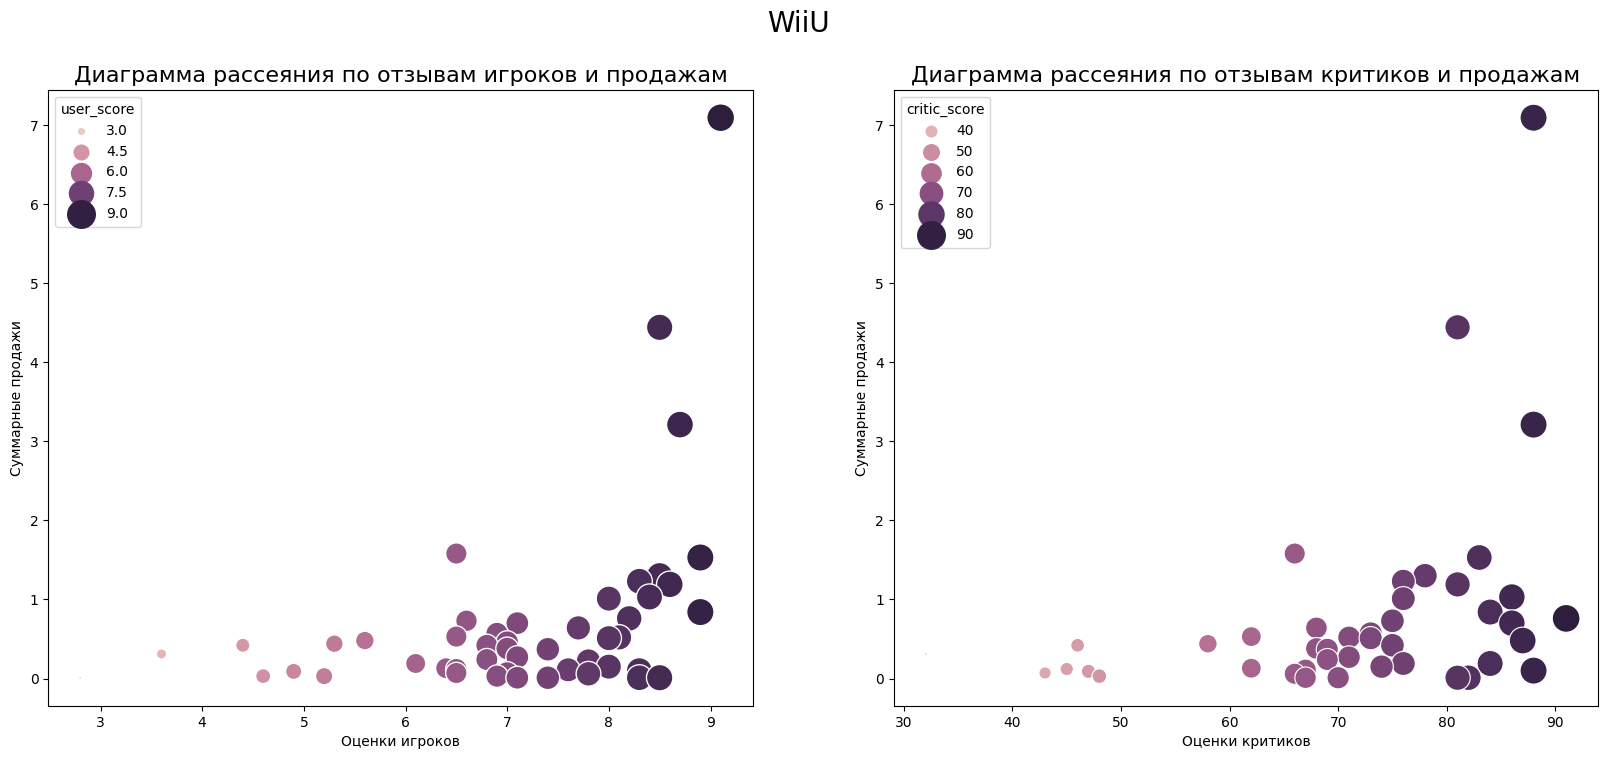

Корреляция между оценками игроков и продажами: 0.40792645792170784
Корреляция между оценками критиков и продажами: 0.370201412480884


In [54]:
# Проведем корреляционный анализ и построим диаграммы рассеяния для платформы WiiU:
corr_wiiu_gamer = df_corr_gamer.query('platform == "WiiU"')
corr_wiiu_critic = df_corr_critic.query('platform == "WiiU"')

fig, axis = plt.subplots(1,2, figsize=(20,8))
   
sb.scatterplot(x='user_score', y='total_sales', hue='user_score', size='user_score', sizes=(5,400), data=corr_wiiu_gamer, ax=axis[0])     
sb.scatterplot(x='critic_score', y='total_sales', hue='critic_score', size='critic_score', sizes=(5,400), data=corr_wiiu_critic, ax=axis[1])
plt.suptitle('WiiU', fontsize=20)
axis[0].set_title('Диаграмма рассеяния по отзывам игроков и продажам', fontsize=16)
axis[0].set_xlabel('Оценки игроков')
axis[0].set_ylabel('Суммарные продажи')
axis[1].set_title('Диаграмма рассеяния по отзывам критиков и продажам', fontsize=16)
axis[1].set_xlabel('Оценки критиков')
axis[1].set_ylabel('Суммарные продажи')
plt.show()
print('Корреляция между оценками игроков и продажами:', corr_wiiu_gamer['user_score'].corr(corr_wiiu_gamer['total_sales']))
print('Корреляция между оценками критиков и продажами:', corr_wiiu_critic['critic_score'].corr(corr_wiiu_critic['total_sales']))

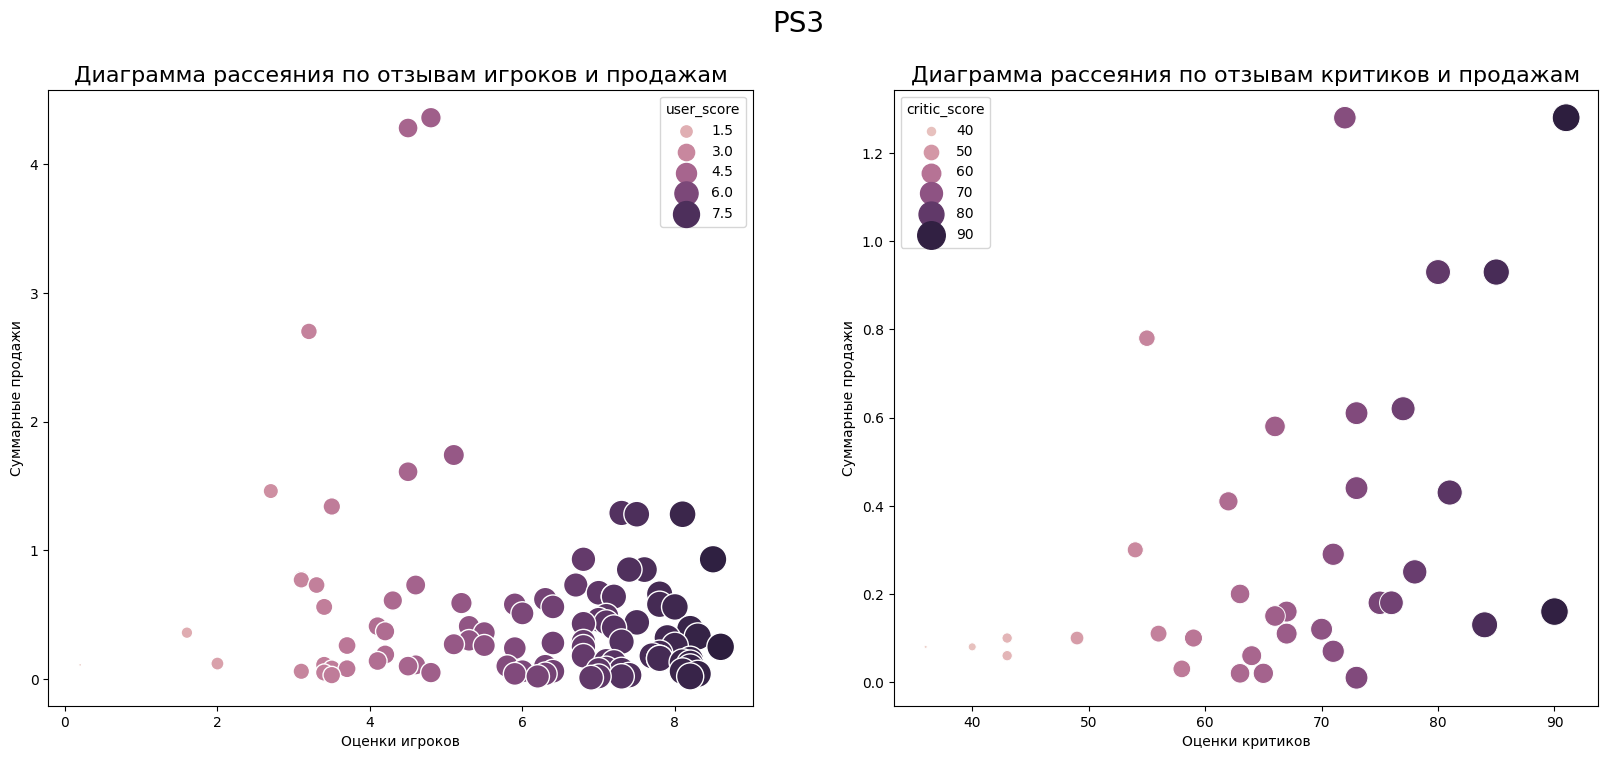

Корреляция между оценками игроков и продажами: -0.16676141347662118
Корреляция между оценками критиков и продажами: 0.44657460493190715


In [55]:
# Проведем корреляционный анализ и построим диаграммы рассеяния для платформы PS3:
corr_ps3_gamer = df_corr_gamer.query('platform == "PS3"')
corr_ps3_critic = df_corr_critic.query('platform == "PS3"')

fig, axis = plt.subplots(1,2, figsize=(20,8))
   
sb.scatterplot(x='user_score', y='total_sales', hue='user_score', size='user_score', sizes=(5,400), data=corr_ps3_gamer, ax=axis[0])     
sb.scatterplot(x='critic_score', y='total_sales', hue='critic_score', size='critic_score', sizes=(5,400), data=corr_ps3_critic, ax=axis[1])
plt.suptitle('PS3', fontsize=20)
axis[0].set_title('Диаграмма рассеяния по отзывам игроков и продажам', fontsize=16)
axis[0].set_xlabel('Оценки игроков')
axis[0].set_ylabel('Суммарные продажи')
axis[1].set_title('Диаграмма рассеяния по отзывам критиков и продажам', fontsize=16)
axis[1].set_xlabel('Оценки критиков')
axis[1].set_ylabel('Суммарные продажи')
plt.show()
print('Корреляция между оценками игроков и продажами:', corr_ps3_gamer['user_score'].corr(corr_ps3_gamer['total_sales']))
print('Корреляция между оценками критиков и продажами:', corr_ps3_critic['critic_score'].corr(corr_ps3_critic['total_sales']))

По шкале **Чеддока** присутствует в основном **очень слабая** корреляция между **отзывами игроков** и **суммарными продажами**, а между **отзывами критиков** и **суммарными продажами** - **слабая**. <br>
В целом можно сделать вывод, что оценки **слабо** влияют на продажи, либо имеют другой, **нелинейный** характер зависимости. Оценки критиков в среднем больше влияют на продажи игры, чем пользовательские, так как они получают доступ к игре намного раньше рядового пользователя и зачастую им платят за обзор игры, но и эти оценки созданы для того, чтобы прорекламировать игру. Скорее всего на продажи игры влияют другие параметры, такие как масштабы рекламной компании, способ распространения (подписки, скидки и так далее). Если даже игрок остался недоволен игрой до такой степени, что решил вернуть за нее деньги, факт возврата в данных не отражен, считается, что он уже совершил покупку, поэтому результат исследования, который говорит о слабом влиянии оценок на продажи, выглядит весьма реалистичным.

Расчет по Платформе 3DS


user_score     0.215193
total_sales    1.000000
Name: total_sales, dtype: float64

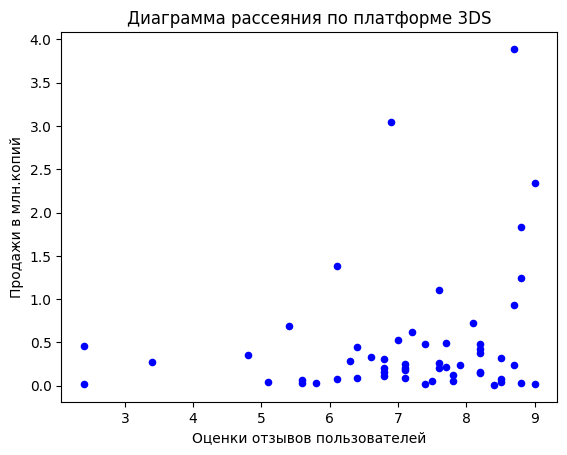

critic_score    0.314117
total_sales     1.000000
Name: total_sales, dtype: float64

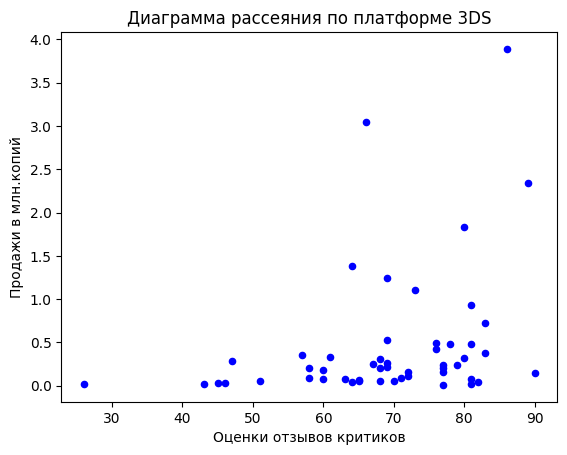

Расчет по Платформе PC


user_score    -0.066417
total_sales    1.000000
Name: total_sales, dtype: float64

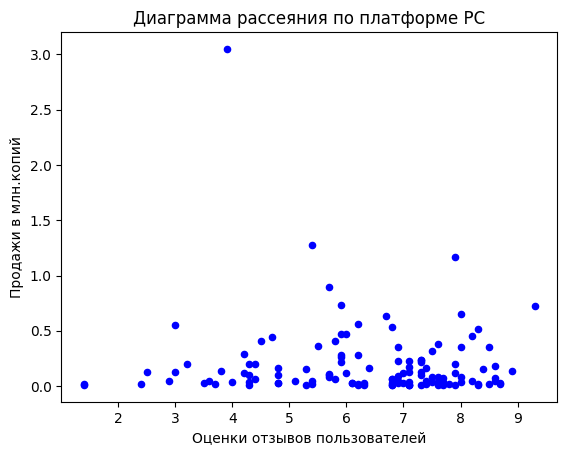

critic_score    0.177272
total_sales     1.000000
Name: total_sales, dtype: float64

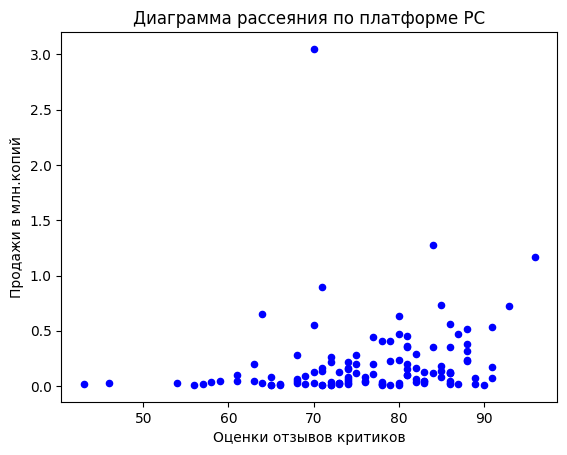

Расчет по Платформе PS3


user_score    -0.166761
total_sales    1.000000
Name: total_sales, dtype: float64

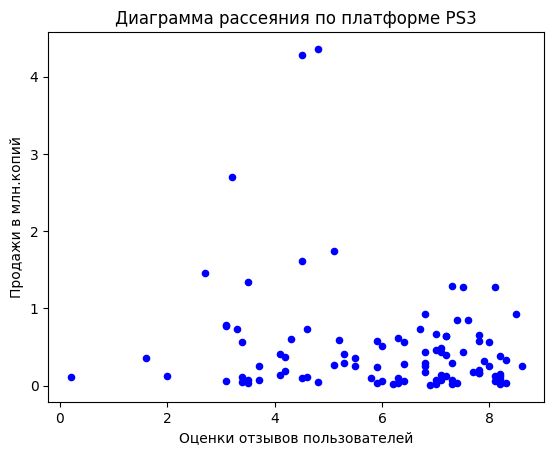

critic_score    0.446575
total_sales     1.000000
Name: total_sales, dtype: float64

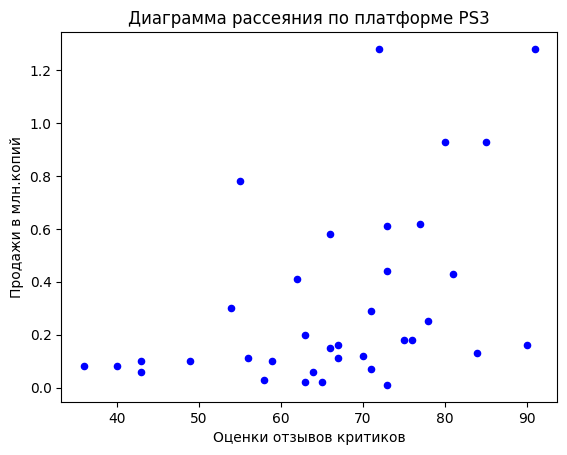

Расчет по Платформе PS4


user_score    -0.040132
total_sales    1.000000
Name: total_sales, dtype: float64

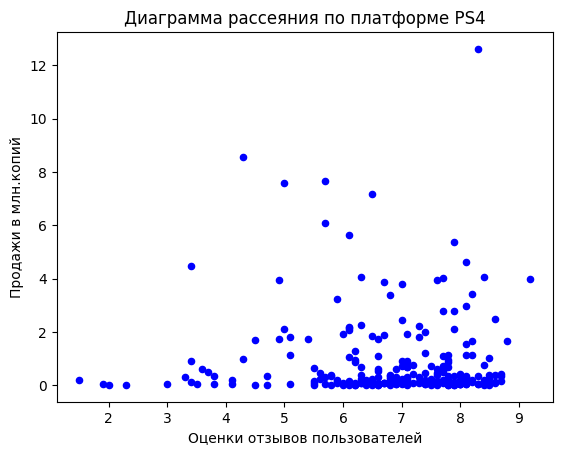

critic_score    0.402661
total_sales     1.000000
Name: total_sales, dtype: float64

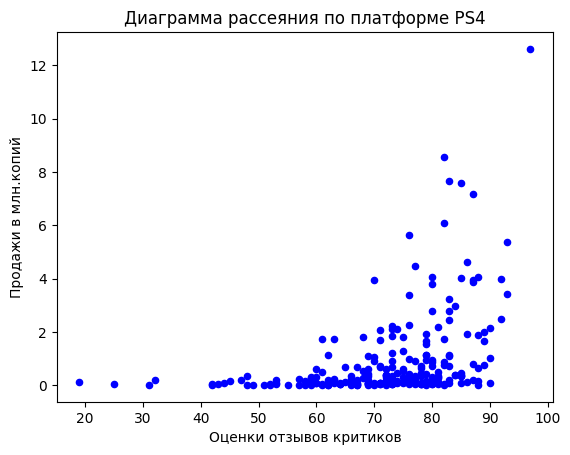

Расчет по Платформе PSP
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PSV


user_score    -0.168455
total_sales    1.000000
Name: total_sales, dtype: float64

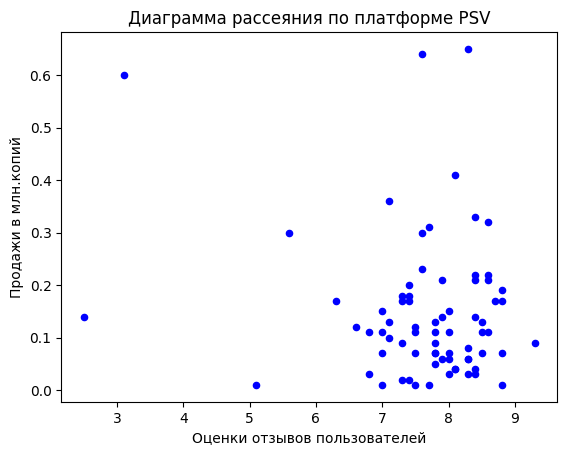

critic_score    0.042665
total_sales     1.000000
Name: total_sales, dtype: float64

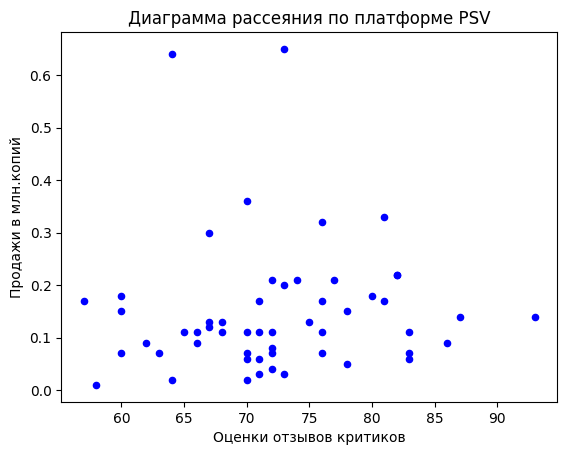

Расчет по Платформе Wii
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе WiiU


user_score     0.407926
total_sales    1.000000
Name: total_sales, dtype: float64

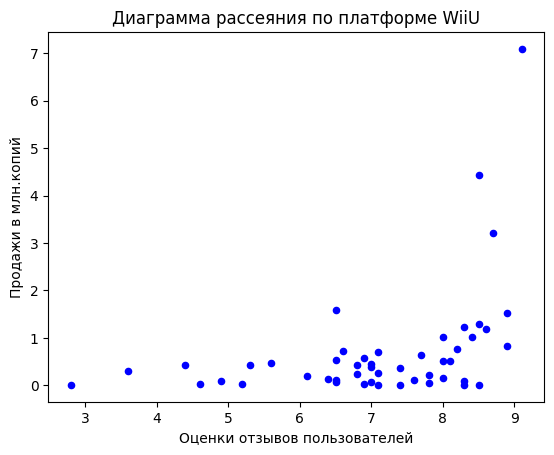

critic_score    0.370201
total_sales     1.000000
Name: total_sales, dtype: float64

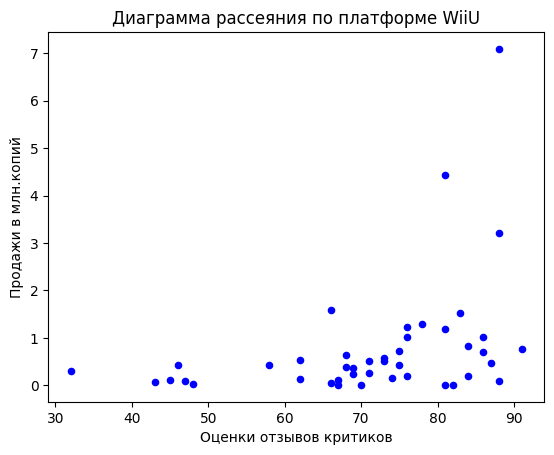

Расчет по Платформе X360


user_score    -0.138445
total_sales    1.000000
Name: total_sales, dtype: float64

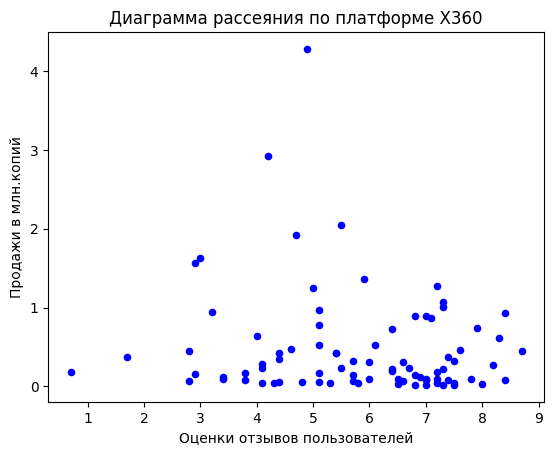

critic_score    0.525723
total_sales     1.000000
Name: total_sales, dtype: float64

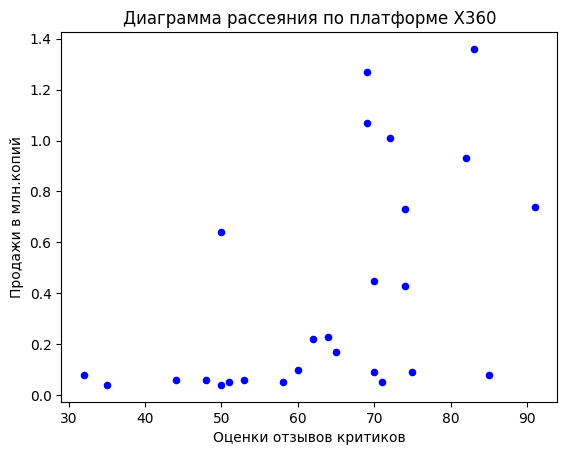

Расчет по Платформе XOne


user_score    -0.070384
total_sales    1.000000
Name: total_sales, dtype: float64

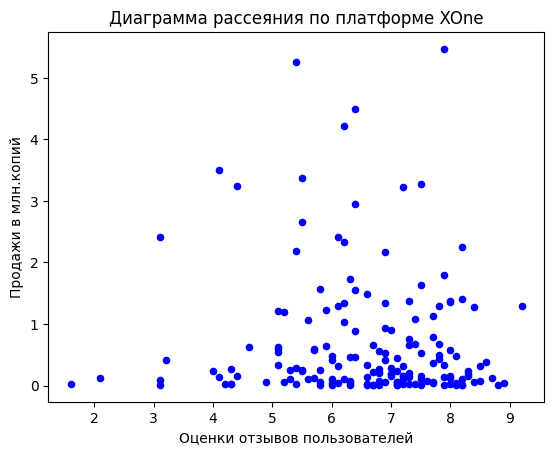

critic_score    0.428677
total_sales     1.000000
Name: total_sales, dtype: float64

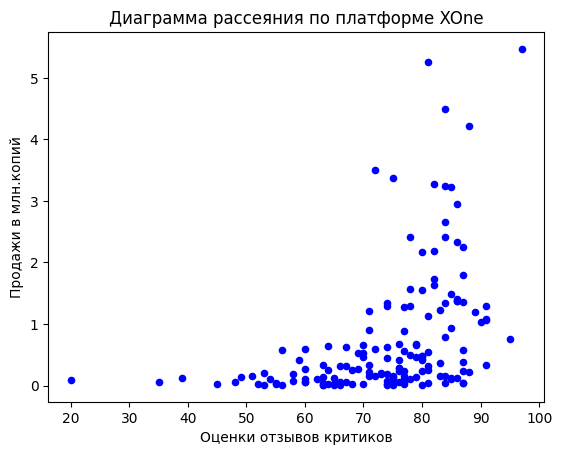

In [56]:
# Весь анализ, представленный выше, только сделанный в одном цикле:
import matplotlib.pyplot as plt
df_sc, y = df.copy(), 'total_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print('Расчет по Платформе',platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[(games_on_pl.user_score != -1)&(games_on_pl['user_score'].notna() == True)])
    not_critic = len(games_on_pl[(games_on_pl.critic_score != -1)&(games_on_pl['user_score'].notna() == True)])
    sum_not = 3 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl[games_on_pl.user_score != -1].plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[games_on_pl.user_score != -1][['user_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов пользователей')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl[games_on_pl.critic_score != -1].plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[games_on_pl.critic_score != -1][['critic_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов критиков')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

## Исследование жанров игр

Посмотрим распределение по количеству проданных игр определенных игровых жанров в зависимости от платформы и года:

,name
genre,
Action,620
Role-Playing,221
Adventure,185
Sports,161
Shooter,128
Misc,113
Racing,69
Fighting,60
Simulation,44


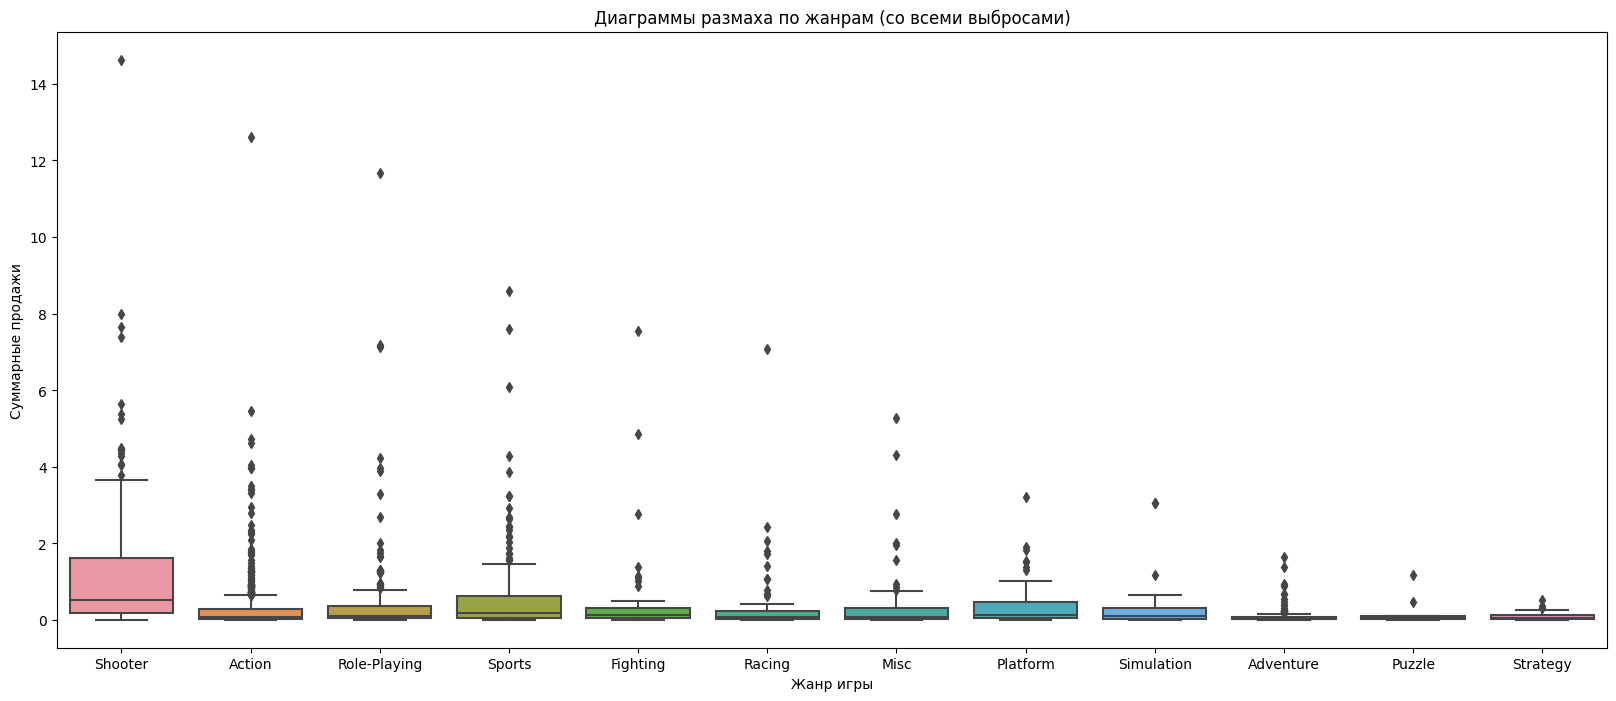

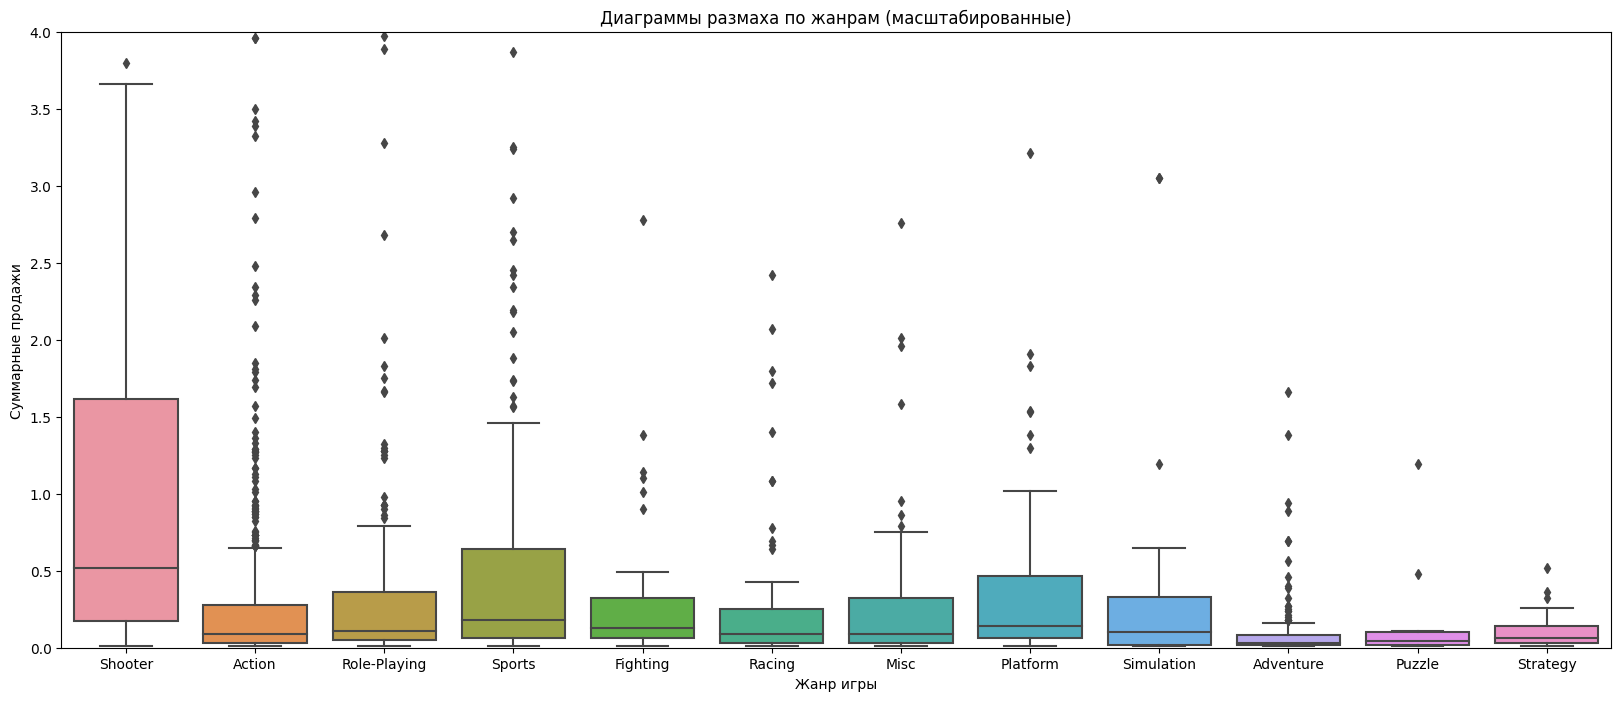

In [57]:
# Игровые жанры по всем платформам:
df_genres = game_table.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False)
display(df_genres)

# полные диаграммы размаха со всеми выбросами:
fig = plt.gcf()
fig.set_size_inches(20,8)
ax = sb.boxplot(x='genre', y='total_sales', data=game_table)
plt.title('Диаграммы размаха по жанрам (со всеми выбросами)')
plt.ylabel('Суммарные продажи')
plt.xlabel('Жанр игры')
plt.show()

# масштабированные диаграммы размаха:
fig = plt.gcf()
fig.set_size_inches(20,8)
ax = sb.boxplot(x='genre', y='total_sales', data=game_table)
plt.ylim(0,4)
plt.title('Диаграммы размаха по жанрам (масштабированные)')
plt.ylabel('Суммарные продажи')
plt.xlabel('Жанр игры')
plt.show()

Самыми прибыльными жанрами за актуальный период являются `Shooter`, `Action`, `Role-Playing`. <br>
Самыми стабильными жанрами за актуальный период являются `Shooter`, `Sports`, `Platform`, `Simulation`. <br>
Таким образом, самым прибыльным, стабильным жанром с самой продаваемой игрой является жанр `Shooter`. <br>
Самыми непопулярными жанрами являются `Adventure`, `Puzzle`, `Strategy`.

## Вывод по шагу 3:

1. По итогам исследования **выпущенных игр по годам** выяснилось, что данные распределены **нормально** с низкими значениями в *"левом хвосте" распределения*. **Актуальным** периодом был выбран временной интервал от **2014** до **2016** года, а также были заполнены некоторые из **нулевых** значений и остальные - **удалены**;
2. По итогам исследования **игровых платформ** выяснилось, что до **2014** года большинство старых платформ уже "умерло", а самыми **крупными по продажам за один год** являются на момент опубликования данных платформы `NES`, `GB`, `Wii`, `DS`, `X360`, `PS3`, `PS2`. Самой **стабильной** платформой является `PC`. Большинство платформ, которые лидировали по продажам в разные годы, в интересующий период времени ***подошли к концу своего жизненного цикла*** (*из исследования этот период равен*  **~7.8 лет**). Из платформ, жизненный цикл которых еще не подошел к окончанию, и при этом за актуальный период у них неплохие продажи, выделялись только две - **PS4** и **XOne** (*X-box One*). Также в эту категорию была включена приставка **3DS**, так как прогноз необходимо выполнить на **2017** год, у данной приставки хорошие подажи в **2016** году, и ее приблизительный жизненный цикл продлится минимум до конца **2017** года. По совокупности факторов, лидирующими приставками были определены **PS4** и **X-box One**, а в **исследовании распределения продаж игр по платформам за актуальный период** это утверждение подтвердилось;
3. По итогам исследования **корреляции между отзывами и продажами** было выявлено, что по шкале **Чеддока** присутствует в основном **очень слабая** корреляция между **отзывами игроков** и **суммарными продажами**, а между **отзывами критиков** и **суммарными продажами** - **слабая**. В целом можно сделать вывод, что оценки **слабо** влияют на продажи, либо имеют другой, **нелинейный** характер зависимости. Оценки критиков в среднем больше влияют на продажи игры, чем пользовательские, так как они получают доступ к игре намного раньше рядового пользователя и зачастую им платят за обзор игры, но и эти оценки созданы для того, чтобы прорекламировать игру. Скорее всего на продажи игры влияют другие параметры, такие как масштабы рекламной компании, способ распространения (подписки, скидки и так далее). Если даже игрок остался недоволен игрой до такой степени, что решил вернуть за нее деньги, факт возврата в данных не отражен, считается, что он уже совершил покупку, поэтому результат исследования, который говорит о слабом влиянии оценок на продажи, выглядит весьма реалистичным.; <br>
4. По итогам исследования **жанров игр** выяснилось, что самыми прибыльными жанрами за актуальный период за актуальный период являются `Shooter`, `Action`, `Role-Playing`. Самыми стабильными жанрами за актуальный период являются `Shooter`, `Sports`, `Platform`, `Simulation`. Таким образом, самым прибыльным, стабильным жанром с самой продаваемой игрой является жанр `Shooter`. Самыми непопулярными жанрами являются `Adventure`, `Puzzle`, `Strategy`.

# Шаг 4. Составление портрета пользователя каждого региона

Для пользователя в каждом из трех регионов (**NA**, **EU**, **JP**) определим: <br>
1. Самые популярные платформы (**топ-5**);
2. Самые популярные жанры (**топ-5**);
3. Влияние рейтинга **ESRB** на продажи в каждом из трех регионов.

## ТОП-5 платформы в каждом регионе

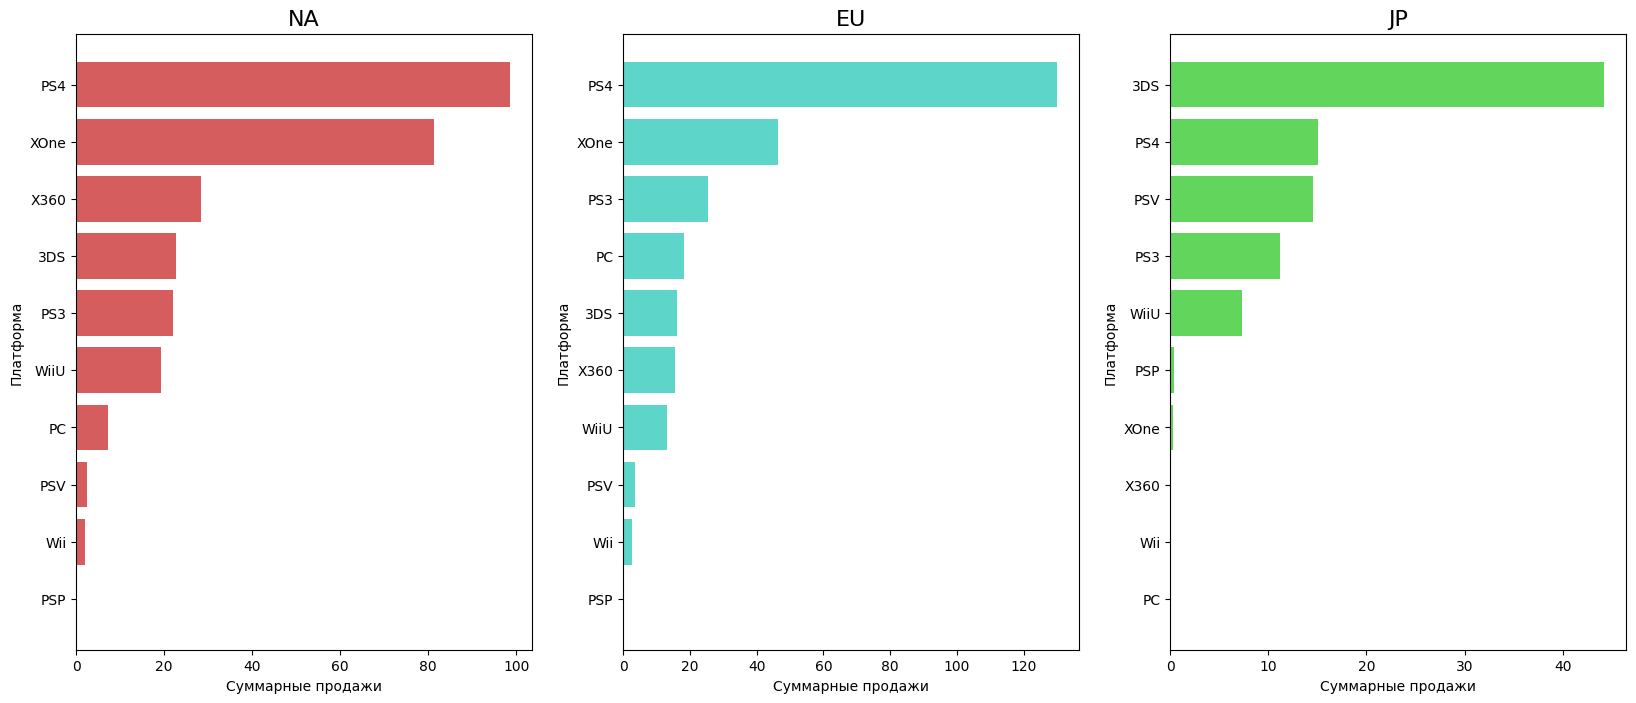

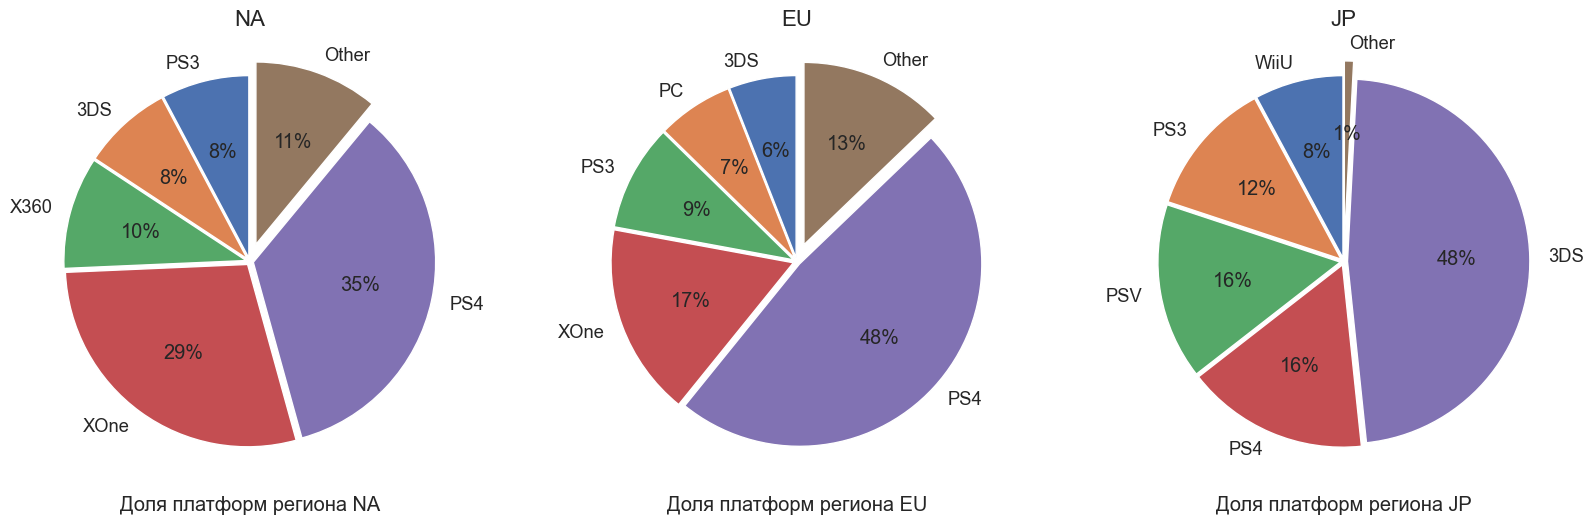

In [58]:
# в срезе данных избавился от платформы PSP, так как она составляет 0% от всех проданных игр во всех регионах:
top5_plat = game_table.groupby('platform').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})

top5_plat_sort_na = top5_plat['na_sales'].sort_values(ascending=True)
top5_plat_sort_eu = top5_plat['eu_sales'].sort_values(ascending=True)
top5_plat_sort_jp = top5_plat['jp_sales'].sort_values(ascending=True)

# строим горизонтальные столбчатые диаграммы в pyplot, чтобы посмотреть на количественное соотношение по платформам:
fig, axis = plt.subplots(1,3, figsize=(20,8))

axis[0].barh(top5_plat_sort_na.index, top5_plat_sort_na, color='#d55d5d')
axis[0].set_title('NA', fontsize=16)
axis[0].set_xlabel('Суммарные продажи')
axis[0].set_ylabel('Платформа')
axis[1].barh(top5_plat_sort_eu.index, top5_plat_sort_eu, color='#5dd5c8')
axis[1].set_title('EU', fontsize=16)
axis[1].set_xlabel('Суммарные продажи')
axis[1].set_ylabel('Платформа')
axis[2].barh(top5_plat_sort_jp.index, top5_plat_sort_jp, color='#62d55d')
axis[2].set_title('JP', fontsize=16)
axis[2].set_xlabel('Суммарные продажи')
axis[2].set_ylabel('Платформа')
plt.show()

# сгруппируем все платформы, которые не входят в топ-5, в отдельную категорию, и построим диаграмму типа pie:
new_row_plat_na = pd.Series(data=top5_plat_sort_na.head().sum(), index=['Other']) # head() потому что платформ всего 10
top5_plat_sort_na = top5_plat_sort_na.append(new_row_plat_na)
plat_pie_na = top5_plat_sort_na.tail(6) #.reset_index(drop=True)

new_row_plat_eu = pd.Series(data=top5_plat_sort_eu.head().sum(), index=['Other'])
top5_plat_sort_eu = top5_plat_sort_eu.append(new_row_plat_eu)
plat_pie_eu = top5_plat_sort_eu.tail(6)

new_row_plat_jp = pd.Series(data=top5_plat_sort_jp.head().sum(), index=['Other'])
top5_plat_sort_jp = top5_plat_sort_jp.append(new_row_plat_jp)
plat_pie_jp = top5_plat_sort_jp.tail(6)

# строим диаграммы типа pie_chart в seaborn, чтобы посмотреть на процентное соотношение по платформам:
sb.set_theme(palette='deep', style='darkgrid', font_scale=1.2)
fig, axis = plt.subplots(1,3, figsize=(20,8))

labels1 = plat_pie_na.index
explode1 = [0.02, 0.02, 0.02, 0.02, 0.02, 0.1]
labels2 = plat_pie_eu.index
explode2 = [0.02, 0.02, 0.02, 0.02, 0.02, 0.1]
labels3 = plat_pie_jp.index
explode3 = [0.02, 0.02, 0.02, 0.02, 0.02, 0.1]

axis[0].pie(plat_pie_na, labels=labels1, autopct='%1.f%%', startangle=90, explode=explode1)
axis[0].set_title('NA', fontsize=16)
axis[0].set_xlabel('Доля платформ региона NA')
axis[1].pie(plat_pie_eu, labels=labels2, autopct='%1.f%%', startangle=90, explode=explode2)
axis[1].set_title('EU', fontsize=16)
axis[1].set_xlabel('Доля платформ региона EU')
axis[2].pie(plat_pie_jp, labels=labels3, autopct='%1.f%%', startangle=90, explode=explode3)
axis[2].set_title('JP', fontsize=16)
axis[2].set_xlabel('Доля платформ региона JP')
plt.show()

**Вывод по ТОП-5 платформам**: <br>
**NA**: `PS4`(**35%** *доли продаж*) -> `XOne`(**29%** *доли продаж*) -> `X360`(**10%** *доли продаж*) -> `3DS`(**8%** *доли продаж*) -> `PS3`(**8%** *доли продаж*) <br>
**EU**: `PS4`(**48%** *доли продаж*) -> `XOne`(**17%** *доли продаж*) -> `PS3`(**9%** *доли продаж*) -> `PC`(**7%** *доли продаж*) -> `3DS`(**6%** *доли продаж*) <br>
**JP**: `3DS`(**48%** *доли продаж*) -> `PS4`(**16%** *доли продаж*) -> `PSV`(**16%** *доли продаж*) -> `PS3`(**12%** *доли продаж*) -> `WiiU`(**8%** *доли продаж*) <br>

## ТОП-5 жанры в каждом регионе

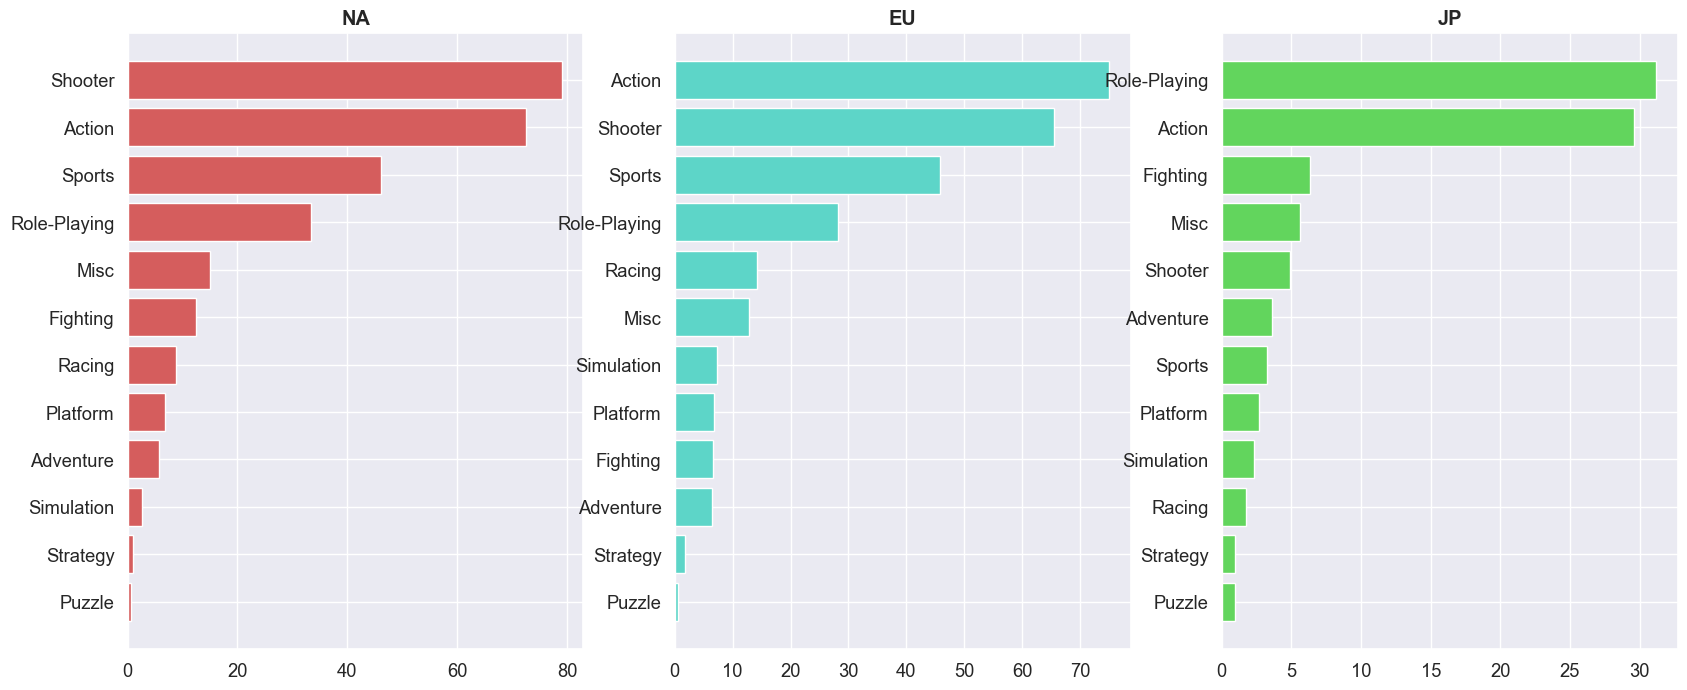

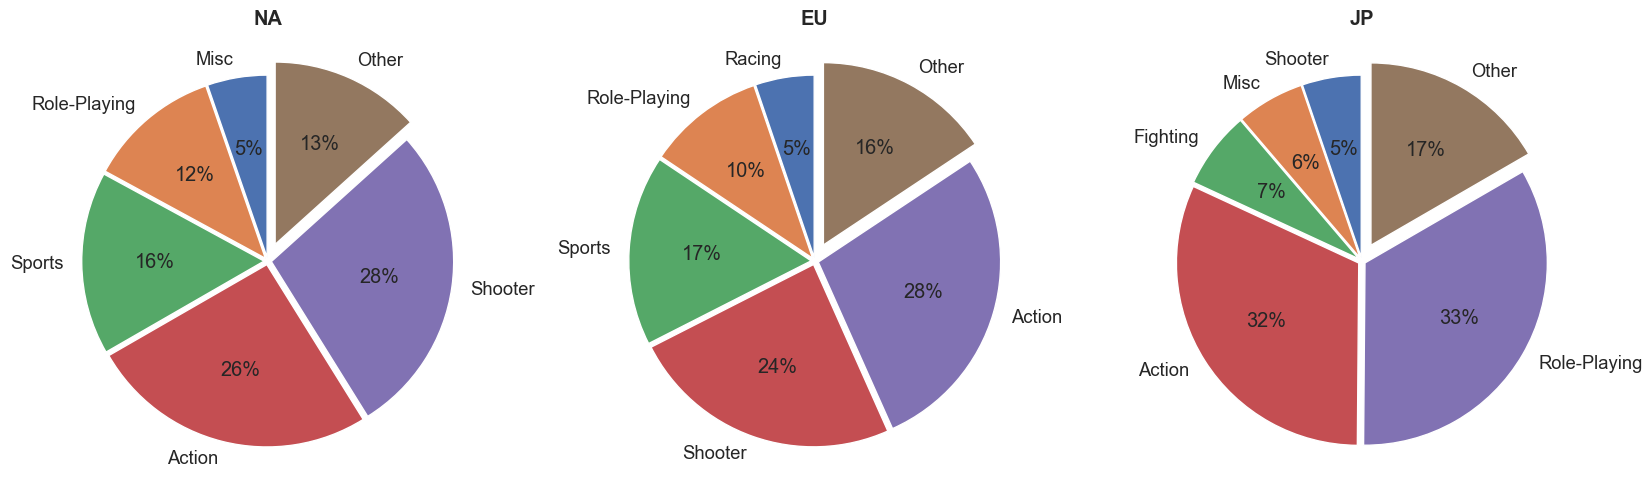

In [59]:
# делаем срез данных по жанрам за 2015 и 2016 годы:
top5_gen = game_table.groupby('genre').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})

top5_gen_sort_na = top5_gen['na_sales'].sort_values(ascending=True)
top5_gen_sort_eu = top5_gen['eu_sales'].sort_values(ascending=True)
top5_gen_sort_jp = top5_gen['jp_sales'].sort_values(ascending=True)

# строим горизонтальные столбчатые диаграммы в pyplot, чтобы посмотреть на количественное соотношение по жанрам:
fig, axis = plt.subplots(1,3, figsize=(20,8))

axis[0].barh(top5_gen_sort_na.index, top5_gen_sort_na, color='#d55d5d')
axis[0].set_title('NA', fontweight='bold')
axis[1].barh(top5_gen_sort_eu.index, top5_gen_sort_eu, color='#5dd5c8')
axis[1].set_title('EU', fontweight='bold')
axis[2].barh(top5_gen_sort_jp.index, top5_gen_sort_jp, color='#62d55d')
axis[2].set_title('JP', fontweight='bold')
plt.show()

# сгруппируем все жанры, которые не входят в топ-5, в отдельную категорию, и построим диаграмму типа pie:
new_row_gen_na = pd.Series(data=top5_gen_sort_na.head(7).sum(), index=['Other']) # head(7) потому что жанров всего 12
top5_gen_sort_na = top5_gen_sort_na.append(new_row_gen_na)
gen_pie_na = top5_gen_sort_na.tail(6) #.reset_index(drop=True)

new_row_gen_eu = pd.Series(data=top5_gen_sort_eu.head(7).sum(), index=['Other'])
top5_gen_sort_eu = top5_gen_sort_eu.append(new_row_gen_eu)
gen_pie_eu = top5_gen_sort_eu.tail(6)

new_row_gen_jp = pd.Series(data=top5_gen_sort_jp.head(7).sum(), index=['Other'])
top5_gen_sort_jp = top5_gen_sort_jp.append(new_row_gen_jp)
gen_pie_jp = top5_gen_sort_jp.tail(6)

# строим диаграммы типа pie_chart в seaborn, чтобы посмотреть на процентное соотношение по жанрам:
sb.set_theme(palette='deep', style='darkgrid', font_scale=1.2)
fig, axis = plt.subplots(1,3, figsize=(20,8))

labels1 = gen_pie_na.index
explode1 = [0.02, 0.02, 0.02, 0.02, 0.02, 0.1]
labels2 = gen_pie_eu.index
explode2 = [0.02, 0.02, 0.02, 0.02, 0.02, 0.1]
labels3 = gen_pie_jp.index
explode3 = [0.02, 0.02, 0.02, 0.02, 0.02, 0.1]

axis[0].pie(gen_pie_na, labels=labels1, autopct='%1.f%%', startangle=90, explode=explode1)
axis[0].set_title('NA', fontweight='bold')
axis[1].pie(gen_pie_eu, labels=labels2, autopct='%1.f%%', startangle=90, explode=explode2)
axis[1].set_title('EU', fontweight='bold')
axis[2].pie(gen_pie_jp, labels=labels3, autopct='%1.f%%', startangle=90, explode=explode3)
axis[2].set_title('JP', fontweight='bold')
plt.show()

**Вывод по ТОП-5 жанрам**: <br>
**NA**: `Shooter`(**28%** *доли продаж*) -> `Action`(**26%** *доли продаж*) -> `Sports`(**16%** *доли продаж*) -> `Role-Playing`(**12%** *доли продаж*) -> `Misc`(**5%** *доли продаж*) <br>
**EU**: `Action`(**28%** *доли продаж*) -> `Shooter`(**24%** *доли продаж*) -> `Sports`(**17%** *доли продаж*) -> `Role-Playing`(**10%** *доли продаж*) -> `Racing`(**5%** *доли продаж*) <br>
**JP**: `Role-Playing`(**33%** *доли продаж*) -> `Action`(**32%** *доли продаж*) -> `Fighting`(**7%** *доли продаж*) -> `Misc`(**6%** *доли продаж*) -> `Shooter`(**5%** *доли продаж*) <br>

## Влияние рейтинга ESRB на продажи в каждом из трех регионов

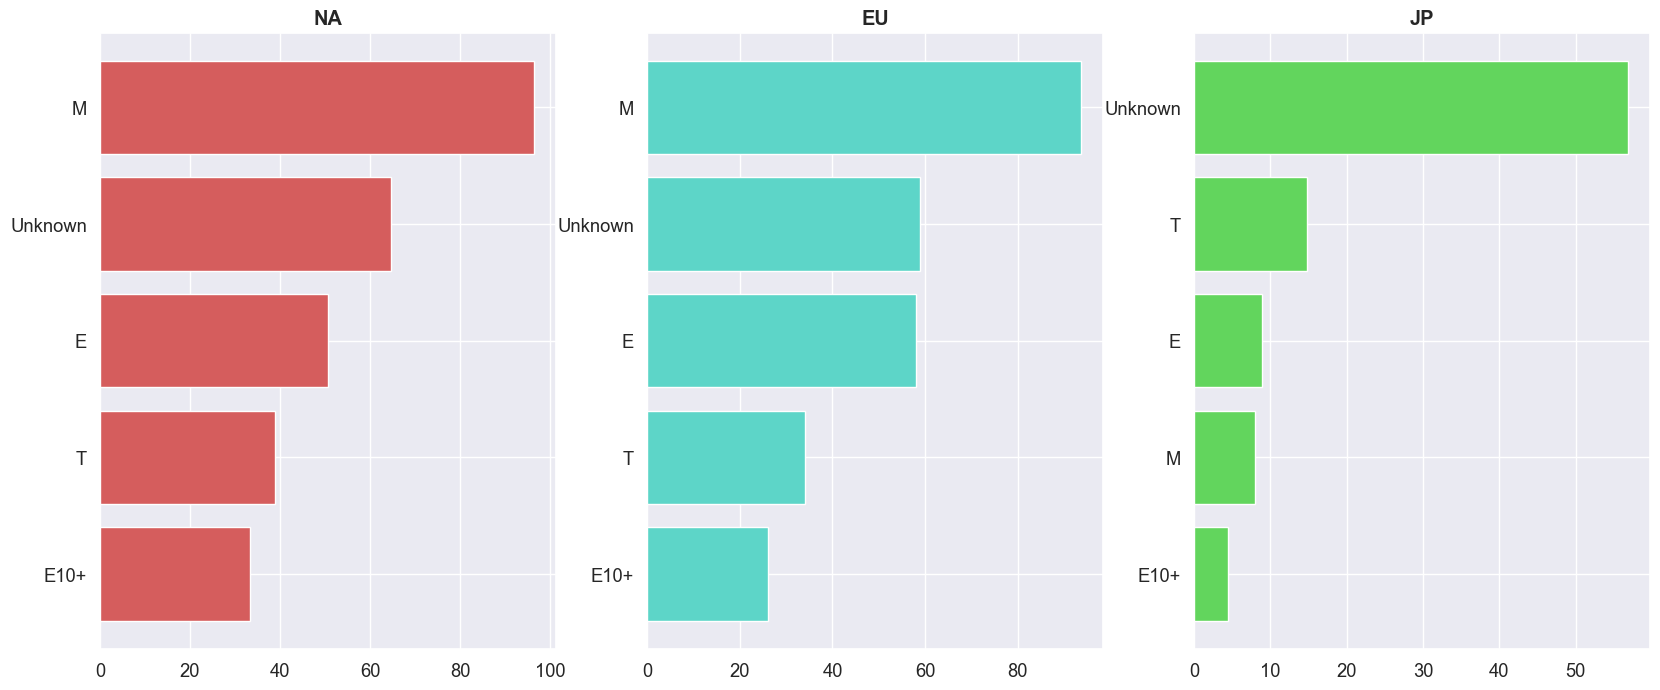

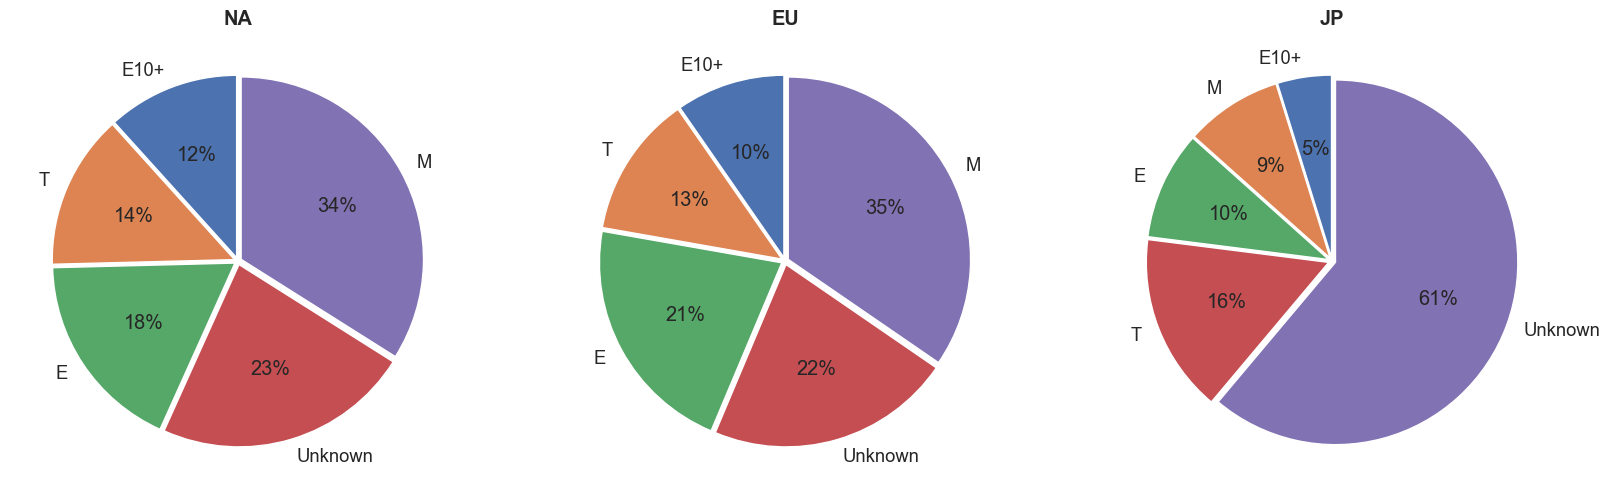

In [60]:
# делаем срез данных по рейтингу ESRB за 2015 и 2016 годы:
esrb = game_table.groupby('rating').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})

esrb_na = esrb['na_sales'].sort_values(ascending=True)
esrb_eu = esrb['eu_sales'].sort_values(ascending=True)
esrb_jp = esrb['jp_sales'].sort_values(ascending=True)

# строим горизонтальные столбчатые диаграммы в pyplot, чтобы посмотреть на количественное соотношение проданных игр по рейтингу ESRB:
fig, axis = plt.subplots(1,3, figsize=(20,8))

axis[0].barh(esrb_na.index, esrb_na, color='#d55d5d')
axis[0].set_title('NA', fontweight='bold')
axis[1].barh(esrb_eu.index, esrb_eu, color='#5dd5c8')
axis[1].set_title('EU', fontweight='bold')
axis[2].barh(esrb_jp.index, esrb_jp, color='#62d55d')
axis[2].set_title('JP', fontweight='bold')
plt.show()

# строим диаграммы типа pie_chart в seaborn, чтобы посмотреть на процентное соотношение проданных игр по рейтингу ESRB:
sb.set_theme(palette='deep', style='darkgrid', font_scale=1.2)
fig, axis = plt.subplots(1,3, figsize=(20,8))

labels1 = esrb_na.index
explode1 = [0.02, 0.02, 0.02, 0.02, 0.02]
labels2 = esrb_eu.index
explode2 = [0.02, 0.02, 0.02, 0.02, 0.02]
labels3 = esrb_jp.index
explode3 = [0.02, 0.02, 0.02, 0.02, 0.02]

axis[0].pie(esrb_na, labels=labels1, autopct='%1.f%%', startangle=90, explode=explode1)
axis[0].set_title('NA', fontweight='bold')
axis[1].pie(esrb_eu, labels=labels2, autopct='%1.f%%', startangle=90, explode=explode2)
axis[1].set_title('EU', fontweight='bold')
axis[2].pie(esrb_jp, labels=labels3, autopct='%1.f%%', startangle=90, explode=explode3)
axis[2].set_title('JP', fontweight='bold')
plt.show()

**Вывод по влиянию системы возрастного рейтинга ESRB на продажи игр**: <br>
В `NA` и `EU` странах рейтинг действительно сильно влияет на продажи, и, несмотря на то, что достаточно большое количество игр в датафрейме представлено без рейтинга или он неизвестен, подавляющее суммарное количество проданных игр имеют рейтинг **ESRB**. При этом распределение по возрастам получилось одинаковым: `M`(***17+***) -> `Unknown` -> `E`(***все***) -> `T`(***13+***) -> `E10+`(***10+***). Большинство продаж игр с рейтингом `M` легко объясняется тем, что совершеннолетние пользователи более платежеспособные, и игры - давно не только вид медиа искусства для детей, который занял прочное место в мировой культуре наравне с фильмами и мультипликацией. <br>
В `JP` регионе ситуация иная - подавляющее большинство игр не имеют возрастного рейтинга по системе **ESRB**. Скорее всего, отличие связано с тем, что в Японии используется система возрастного рейтинга **CERO** и в целом контент цензурируется и оценивается по другим стандартам. В **CERO** есть только **два** совпадения в рейтингах по возрасту - **A**(***все***) в **CERO** и **E** в **ESRB**, **D**(***17+***) в **CERO** и **M** в **ESRB**.

## Вывод по шагу 4:

**ТОП-5 платформами в каждом регионе оказались**: <br>
**NA**: `PS4`(**35%** *доли продаж*) -> `XOne`(**29%** *доли продаж*) -> `X360`(**10%** *доли продаж*) -> `3DS`(**8%** *доли продаж*) -> `PS3`(**8%** *доли продаж*) <br>
**EU**: `PS4`(**48%** *доли продаж*) -> `XOne`(**17%** *доли продаж*) -> `PS3`(**9%** *доли продаж*) -> `PC`(**7%** *доли продаж*) -> `3DS`(**6%** *доли продаж*) <br>
**JP**: `3DS`(**48%** *доли продаж*) -> `PS4`(**16%** *доли продаж*) -> `PSV`(**16%** *доли продаж*) -> `PS3`(**12%** *доли продаж*) -> `WiiU`(**8%** *доли продаж*) <br>
По совокупности факторов, самой успешной платформой остается `PS4`, уступая лишь немного `3DS` в регионе `JP`; <br>
**ТОП-5 игровыми жанрами в каждом регионе оказались**: <br>
**NA**: `Shooter`(**28%** *доли продаж*) -> `Action`(**26%** *доли продаж*) -> `Sports`(**16%** *доли продаж*) -> `Role-Playing`(**12%** *доли продаж*) -> `Misc`(**5%** *доли продаж*) <br>
**EU**: `Action`(**28%** *доли продаж*) -> `Shooter`(**24%** *доли продаж*) -> `Sports`(**17%** *доли продаж*) -> `Role-Playing`(**10%** *доли продаж*) -> `Racing`(**5%** *доли продаж*) <br>
**JP**: `Role-Playing`(**33%** *доли продаж*) -> `Action`(**32%** *доли продаж*) -> `Fighting`(**7%** *доли продаж*) -> `Misc`(**6%** *доли продаж*) -> `Shooter`(**5%** *доли продаж*) <br>
**Вывод по влиянию системы возрастного рейтинга ESRB на продажи игр**: <br>
После исследования **влияния ESRB рейтинга на продажи в каждом из трех регионов** выяснилось, что в `NA` и `EU` странах рейтинг действительно сильно влияет на продажи, и, несмотря на то, что достаточно большое количество игр в датафрейме представлено без рейтинга или он неизвестен, подавляющее суммарное количество проданных игр имеют рейтинг **ESRB**. При этом распределение по возрастам получилось одинаковым: `M`(***17+***) -> `Unknown` -> `E`(***все***) -> `T`(***13+***) -> `E10+`(***10+***). Большинство продаж игр с рейтингом `M` легко объясняется тем, что совершеннолетние пользователи более платежеспособные, и игры - давно не только вид медиа искусства для детей, который занял прочное место в мировой культуре наравне с фильмами и мультипликацией. В `JP` регионе ситуация иная - подавляющее большинство игр не имеют возрастного рейтинга по системе **ESRB**. Скорее всего, отличие связано с тем, что в Японии используется система возрастного рейтинга **CERO** и в целом контент цензурируется и оценивается по другим стандартам. В **CERO** есть только **два** совпадения в рейтингах по возрасту - **A**(***все***) в **CERO** и **E** в **ESRB**, **D**(***17+***) в **CERO** и **M** в **ESRB**.

# Шаг 5. Проверка гипотез

## Гипотеза № 1:
***Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.***

Необходимо проверить `гипотезу о равенстве средних двух генеральных совокупностей` (**двустороннюю** гипотезу). <br>
Сформулируем `нулевую` и `альтернативную` гипотезы: <br>
**H<sub>0</sub>:** средние значения пользовательских рейтингов платформ **Xbox One** и **PC** - `одинаковые` (*т.е. проверяем нулевую гипотезу о равенстве разности между двумя средними нулю*); <br>
**H<sub>1</sub>:** средние значения пользовательских рейтингов платформ **Xbox One** и **PC** `различаются`. <br>

### Проверка гипотезы № 1 за актуальный период:

In [61]:
# Рассчитываем средние значения пользовательских оценок платформ Xbox One и PC:
xbox_table = game_table.query('platform == "XOne" and user_score > 0')
pc_table = game_table.query('platform == "PC" and user_score > 0')

print('Средняя пользовательская оценка игр на Xbox One:', xbox_table['user_score'].mean())
print('Средняя пользовательская оценка игр на PC:', pc_table['user_score'].mean())


# задаем уровень статистической значимости:
alpha = 0.05

results = st.ttest_ind(xbox_table['user_score'], pc_table['user_score'], equal_var=False, alternative='two-sided')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Нулевая гипотеза отвергнута')
else:
    print('Не вышло отвергнуть нулевую гипотезу')

Средняя пользовательская оценка игр на Xbox One: 6.594545454545454
Средняя пользовательская оценка игр на PC: 6.316260162601626
p-значение: 0.1392371204354856
Не вышло отвергнуть нулевую гипотезу


In [62]:
# Комментарий ревьюера
xbox_table.user_score.min(), pc_table.user_score.min()

(1.6, 1.4)

## Вывод по гипотезе № 1:

Гипотеза о **равенстве** средних пользовательских рейтингов платформ **Xbox One** и **PC** `подтвердилась` на актуальном временном интервале.

## Гипотеза № 2:
***Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.***

Необходимо проверить `гипотезу о равенстве средних двух генеральных совокупностей` (**двустороннюю** гипотезу). <br>
Сформулируем `нулевую` и `альтернативную` гипотезы: <br>
**H<sub>0</sub>:** средние значения пользовательских рейтингов жанров **Action** и **Sports** - `одинаковые` (*т.е. проверяем нулевую гипотезу о равенстве разности между двумя средними нулю*); <br>
**H<sub>1</sub>:** средние значения пользовательских рейтингов жанров **Action** и **Sports** `различаются`. <br>

### Проверка гипотезы № 2 за актуальный период:

In [63]:
# Рассчитываем средние значения пользовательских оценок жанров Action и Sports:
action_table = game_table.query('genre == "Action" and user_score > 0')
sports_table = game_table.query('genre == "Sports" and user_score > 0')

print('Средняя пользовательская оценка игр в жанре Action:', action_table['user_score'].mean())
print('Средняя пользовательская оценка игр в жанре Sports:', sports_table['user_score'].mean())


# задаем уровень статистической значимости:
alpha = 0.05

results2 = st.ttest_ind(action_table['user_score'], sports_table['user_score'], equal_var=False, alternative='two-sided')

print('p-значение:', results2.pvalue)

if (results2.pvalue < alpha):
    print('Нулевая гипотеза отвергнута')
else:
    print('Не вышло отвергнуть нулевую гипотезу')

Средняя пользовательская оценка игр в жанре Action: 6.766442953020134
Средняя пользовательская оценка игр в жанре Sports: 5.2251968503937
p-значение: 9.658176026869592e-15
Нулевая гипотеза отвергнута


## Вывод по гипотезе № 2:

Гипотеза о **неравенстве** средних пользовательских рейтингов жанров **Action** и **Sports** подтвердилась (так как **H<sub>0</sub>** была отвергнута, а **H<sub>1</sub>** подтвердилась) на актуальном временном интервале.

## Вывод по шагу 5:

Обе гипотезы были о **равенстве средних двух генеральных совокупностей** (в первом случае - равенство средних рейтингов двух разных платформ, во втором - различие средних рейтингов двух разных жанров). Средние генеральных совокупностей, как и средние взятых из них выборок, могут различаться, но недостаточно сильно, чтобы сделать вывод о том, что эта разница неслучайна. На этот вопрос и отвечает статистический тест: достаточно ли большое различие мы наблюдаем с учётом разброса, чтобы отвергнуть нулевую гипотезу об их равенстве. В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: `scipy.stats.ttest_ind(array1, array2, equal_var, alternative)`. <br>
**Нулевая гипотеза** в обоих случаях формулировалась по принципу: ***"средние значения совокупностей равны"***. В первом случае гипотеза была бы подтверждена, если бы ***подтвердилась нулевая гипотеза***, во втором случае наоборот - она была бы подтверждена, если бы ***нулевая гипотеза была отвергнута*** в пользу альтернативной.

# Шаг 6. Общий вывод

1. По итогам исследования **выпущенных игр по годам** выяснилось, что данные распределены **нормально** с низкими значениями в *"левом хвосте" распределения*. **Актуальным** периодом был выбран временной интервал от **2014** до **2016** года, а также были заполнены некоторые из **нулевых** значений и остальные - **удалены**;
2. По итогам исследования **игровых платформ** выяснилось, что до **2014** года большинство старых платформ уже "умерло", а самыми **крупными по продажам за один год** являются на момент опубликования данных платформы `NES`, `GB`, `Wii`, `DS`, `X360`, `PS3`, `PS2`. Самой **стабильной** платформой является `PC`. Большинство платформ, которые лидировали по продажам в разные годы, в интересующий период времени ***подошли к концу своего жизненного цикла*** (*из исследования этот период равен*  **~7.8 лет**). Из платформ, жизненный цикл которых еще не подошел к окончанию, и при этом за актуальный период у них неплохие продажи, выделялись только две - **PS4** и **XOne** (*X-box One*). Также в эту категорию была включена приставка **3DS**, так как прогноз необходимо выполнить на **2017** год, у данной приставки хорошие подажи в **2016** году, и ее приблизительный жизненный цикл продлится минимум до конца **2017** года. По совокупности факторов, лидирующими приставками были определены **PS4** и **X-box One**, а в **исследовании распределения продаж игр по платформам за актуальный период** это утверждение подтвердилось;
3. По итогам исследования **корреляции между отзывами и продажами** было выявлено, что по шкале **Чеддока** присутствует в основном **очень слабая** корреляция между **отзывами игроков** и **суммарными продажами**, а между **отзывами критиков** и **суммарными продажами** - **слабая**. В целом можно сделать вывод, что оценки **слабо** влияют на продажи, либо имеют другой, **нелинейный** характер зависимости. Оценки критиков в среднем больше влияют на продажи игры, чем пользовательские, так как они получают доступ к игре намного раньше рядового пользователя и зачастую им платят за обзор игры, но и эти оценки созданы для того, чтобы прорекламировать игру. Скорее всего на продажи игры влияют другие параметры, такие как масштабы рекламной компании, способ распространения (подписки, скидки и так далее). Если даже игрок остался недоволен игрой до такой степени, что решил вернуть за нее деньги, факт возврата в данных не отражен, считается, что он уже совершил покупку, поэтому результат исследования, который говорит о слабом влиянии оценок на продажи, выглядит весьма реалистичным.; <br>
4. По итогам исследования **жанров игр** выяснилось, что самыми прибыльными жанрами за актуальный период за актуальный период являются `Shooter`, `Action`, `Role-Playing`. Самыми стабильными жанрами за актуальный период являются `Shooter`, `Sports`, `Platform`, `Simulation`. Таким образом, самым прибыльным, стабильным жанром с самой продаваемой игрой является жанр `Shooter`. Самыми непопулярными жанрами являются `Adventure`, `Puzzle`, `Strategy`;
5. **ТОП-5 платформами в каждом регионе оказались**: <br>
    **NA**: `PS4`(**35%** *доли продаж*) -> `XOne`(**29%** *доли продаж*) -> `X360`(**10%** *доли продаж*) -> `3DS`(**8%** *доли продаж*) -> `PS3`(**8%** *доли продаж*) <br>
    **EU**: `PS4`(**48%** *доли продаж*) -> `XOne`(**17%** *доли продаж*) -> `PS3`(**9%** *доли продаж*) -> `PC`(**7%** *доли продаж*) -> `3DS`(**6%** *доли продаж*) <br>
    **JP**: `3DS`(**48%** *доли продаж*) -> `PS4`(**16%** *доли продаж*) -> `PSV`(**16%** *доли продаж*) -> `PS3`(**12%** *доли продаж*) -> `WiiU`(**8%** *доли продаж*) <br>
    По совокупности факторов, самой успешной платформой остается `PS4`, уступая лишь немного `3DS` в регионе `JP`; <br>
6. **ТОП-5 игровыми жанрами в каждом регионе оказались**: <br>
    **NA**: `Shooter`(**28%** *доли продаж*) -> `Action`(**26%** *доли продаж*) -> `Sports`(**16%** *доли продаж*) -> `Role-Playing`(**12%** *доли продаж*) -> `Misc`(**5%** *доли продаж*) <br>
    **EU**: `Action`(**28%** *доли продаж*) -> `Shooter`(**24%** *доли продаж*) -> `Sports`(**17%** *доли продаж*) -> `Role-Playing`(**10%** *доли продаж*) -> `Racing`(**5%** *доли продаж*) <br>
    **JP**: `Role-Playing`(**33%** *доли продаж*) -> `Action`(**32%** *доли продаж*) -> `Fighting`(**7%** *доли продаж*) -> `Misc`(**6%** *доли продаж*) -> `Shooter`(**5%** *доли продаж*) <br>
6. После исследования **влияния ESRB рейтинга на продажи в каждом из трех регионов** выяснилось, что в `NA` и `EU` странах рейтинг действительно сильно влияет на продажи, и, несмотря на то, что достаточно большое количество игр в датафрейме представлено без рейтинга или он неизвестен, подавляющее суммарное количество проданных игр имеют рейтинг **ESRB**. При этом распределение по возрастам получилось одинаковым: `M`(***17+***) -> `Unknown` -> `E`(***все***) -> `T`(***13+***) -> `E10+`(***10+***). Большинство продаж игр с рейтингом `M` легко объясняется тем, что совершеннолетние пользователи более платежеспособные, и игры - давно не только вид медиа искусства для детей, который занял прочное место в мировой культуре наравне с фильмами и мультипликацией. В `JP` регионе ситуация иная - подавляющее большинство игр не имеют возрастного рейтинга по системе **ESRB**. Скорее всего, отличие связано с тем, что в Японии используется система возрастного рейтинга **CERO** и в целом контент цензурируется и оценивается по другим стандартам. В **CERO** есть только **два** совпадения в рейтингах по возрасту - **A**(***все***) в **CERO** и **E** в **ESRB**, **D**(***17+***) в **CERO** и **M** в **ESRB**.

Итак, по совокупности "идеальной" игрой для выпуска в **2017** году для регионов `US` и `EU` является игра в жанрах `Shooter`, `Action`, `Role-Playing`, `Sports` на платформах `PS4` и `X-box One` с последующим портированием на `PC` с возрастным рейтингом `M`. Доступ к игре необходимо дать прессе (критикам) заранее, так как они поднимут интерес к игре, но это не является критичным для проведения рекламной компании. Оценки пользователей влияют на продажи слабо, поэтому можно не устраивать публичный бета-тест. <br>
Ситуация для "идеальной" игры в регионе `JP` несколько отличается. В отличие от регионов `US` и `EU`, которые примерно делят один рынок и особо не ориентируются на другие страны, "идеальная игра" региона `JP` должна не только отвечать требованиям внутреннего рынка, но еще и ориентироваться на аудиторию `US` и `EU`. В такой ситуации самым эффктивным было бы выпустить игру в жанрах `Action`, `Role-playing` с элементами жанра `Shooter` (так как это топ-1 жанр в регионах `US` и `EU`, хоть он и не особо популярен в Японии), на платформы `3DS` (или новую платформу, которая ее заменит, так как жизненный срок этой платформы подходит к концу), `PS4` и `X-box One` с рейтингом `E`, так как это один из немногих рейтингов, который совпадает с японским и охватывает бОльшую аудиторию. Доступ к игре также необходимо дать прессе (критикам), причем во всех регионах одновременно, а вот публичный тест игры ввиду разной аудитории регионов лучше не устраивать. <br>
**P.S.** интересным фактом является то, что в **2017** году игрой года стала `The Legend of Zelda: Breath of the Wild`, которая имеет основные жанры `Action`, `RPG` с элементами жанра `Shooter` от третьего лица, а также обладает уникальной киллер-фичей - **открытым миром**, таким образом имея в своем распоряжении все, что необходимо, чтобы заинтересовать западную и европейскую аудитории. Она стала одной из первых игр и флагманом новой игровой консоли `Nintendo Switch`, которая полностью заменила `3DS`. Портирована на другие платформы она не была как раз из-за эксклюзивности платформы, из-за которой ее продажи значительно взлетели. Таким образом, была проведена идеальная рекламная компания, и с версией "идеальной" игры в выводе она не совпала только тем, что не была портирована на `PS4` и `X-box One`.